<header style="background-color:rgb(237,237,237);padding:15px;border-radius:5px">
    <h2 style="font-size:40px;text-align:center;" >Final Project</h2>
    <hr style="display: block;border-width: 1px;border-style:inset;">
    <h2 style="font-size:30px;text-align:left;" >Group members :</h2>
    <h3 style="font-size:15px;">&emsp; Sahil Rajapkar</h3>
    <h3 style="font-size:15px;">&emsp; Sajin Shajee</h3>
    <h3 style="font-size:15px;">&emsp; Jose Viteri</h3>
</header>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Installing necessary packages</p>

In [1]:
# install.packages('mlbench')
# install.packages('caret')
# install.packages('lifecycle',version='1.0.3')
# install.packages('vctrs',version='0.5.0')
# install.packages("randomForest")
# install.packages('xgboost')

In [2]:
library(tidyverse)
library(mlbench)
library(caret)
library(repr)
library(randomForest)
library(xgboost)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
"package 'mlbench' was built under R version 4.2.2"
Warning message:
"package 'caret' was built under R version 4.2.2"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The foll

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Importing our data</p>

In [3]:
sales_Data <- read.csv('competitive-data-science-predict-future-sales/sales_train.csv')
testData <- read.csv('competitive-data-science-predict-future-sales/test.csv')
itemsData <- read.csv('competitive-data-science-predict-future-sales/items.csv')
shopsData <- read.csv('competitive-data-science-predict-future-sales/shops.csv')
itemsCatData <- read.csv('competitive-data-science-predict-future-sales/item_categories.csv')

In [4]:
head(sales_Data)

date       date_block_num shop_id item_id item_price item_cnt_day
1 02.01.2013 0              59      22154    999.00     1          
2 03.01.2013 0              25       2552    899.00     1          
3 05.01.2013 0              25       2552    899.00    -1          
4 06.01.2013 0              25       2554   1709.05     1          
5 15.01.2013 0              25       2555   1099.00     1          
6 10.01.2013 0              25       2564    349.00     1

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Formatting our date column</p>

In [5]:
sales_Data$date<-as.Date(sales_Data$date,format = "%d.%m.%Y")
sales_Data<-sales_Data %>% arrange(sales_Data$date)

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">Data exploration</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Generating a dataframe that counts the number of item solds per shop</p>

In [6]:
df<-c()
# nrow(sales_Data)
summary(sales_Data)
shops <- sort(unique(sales_Data$shop_id))
for(shop in shops){   
    df<-rbind(df,c(shop,sum(sales_Data[which(sales_Data$shop_id==shop), 6])))
#     cat(shop,"\t",df,"\n")
}
# head(df)
summary(df)

      date            date_block_num     shop_id      item_id     
 Min.   :2013-01-01   Min.   : 0.00   Min.   : 0   Min.   :    0  
 1st Qu.:2013-08-01   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Median :2014-03-04   Median :14.00   Median :31   Median : 9343  
 Mean   :2014-04-03   Mean   :14.57   Mean   :33   Mean   :10197  
 3rd Qu.:2014-12-05   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 Max.   :2015-10-31   Max.   :33.00   Max.   :59   Max.   :22169  
   item_price        item_cnt_day     
 Min.   :    -1.0   Min.   : -22.000  
 1st Qu.:   249.0   1st Qu.:   1.000  
 Median :   399.0   Median :   1.000  
 Mean   :   890.9   Mean   :   1.243  
 3rd Qu.:   999.0   3rd Qu.:   1.000  
 Max.   :307980.0   Max.   :2169.000  

       V1              V2        
 Min.   : 0.00   Min.   :   330  
 1st Qu.:14.75   1st Qu.: 23333  
 Median :29.50   Median : 50176  
 Mean   :29.50   Mean   : 60803  
 3rd Qu.:44.25   3rd Qu.: 69562  
 Max.   :59.00   Max.   :310777  

Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"



Shop ID 31 sold the most items based on the histogram:

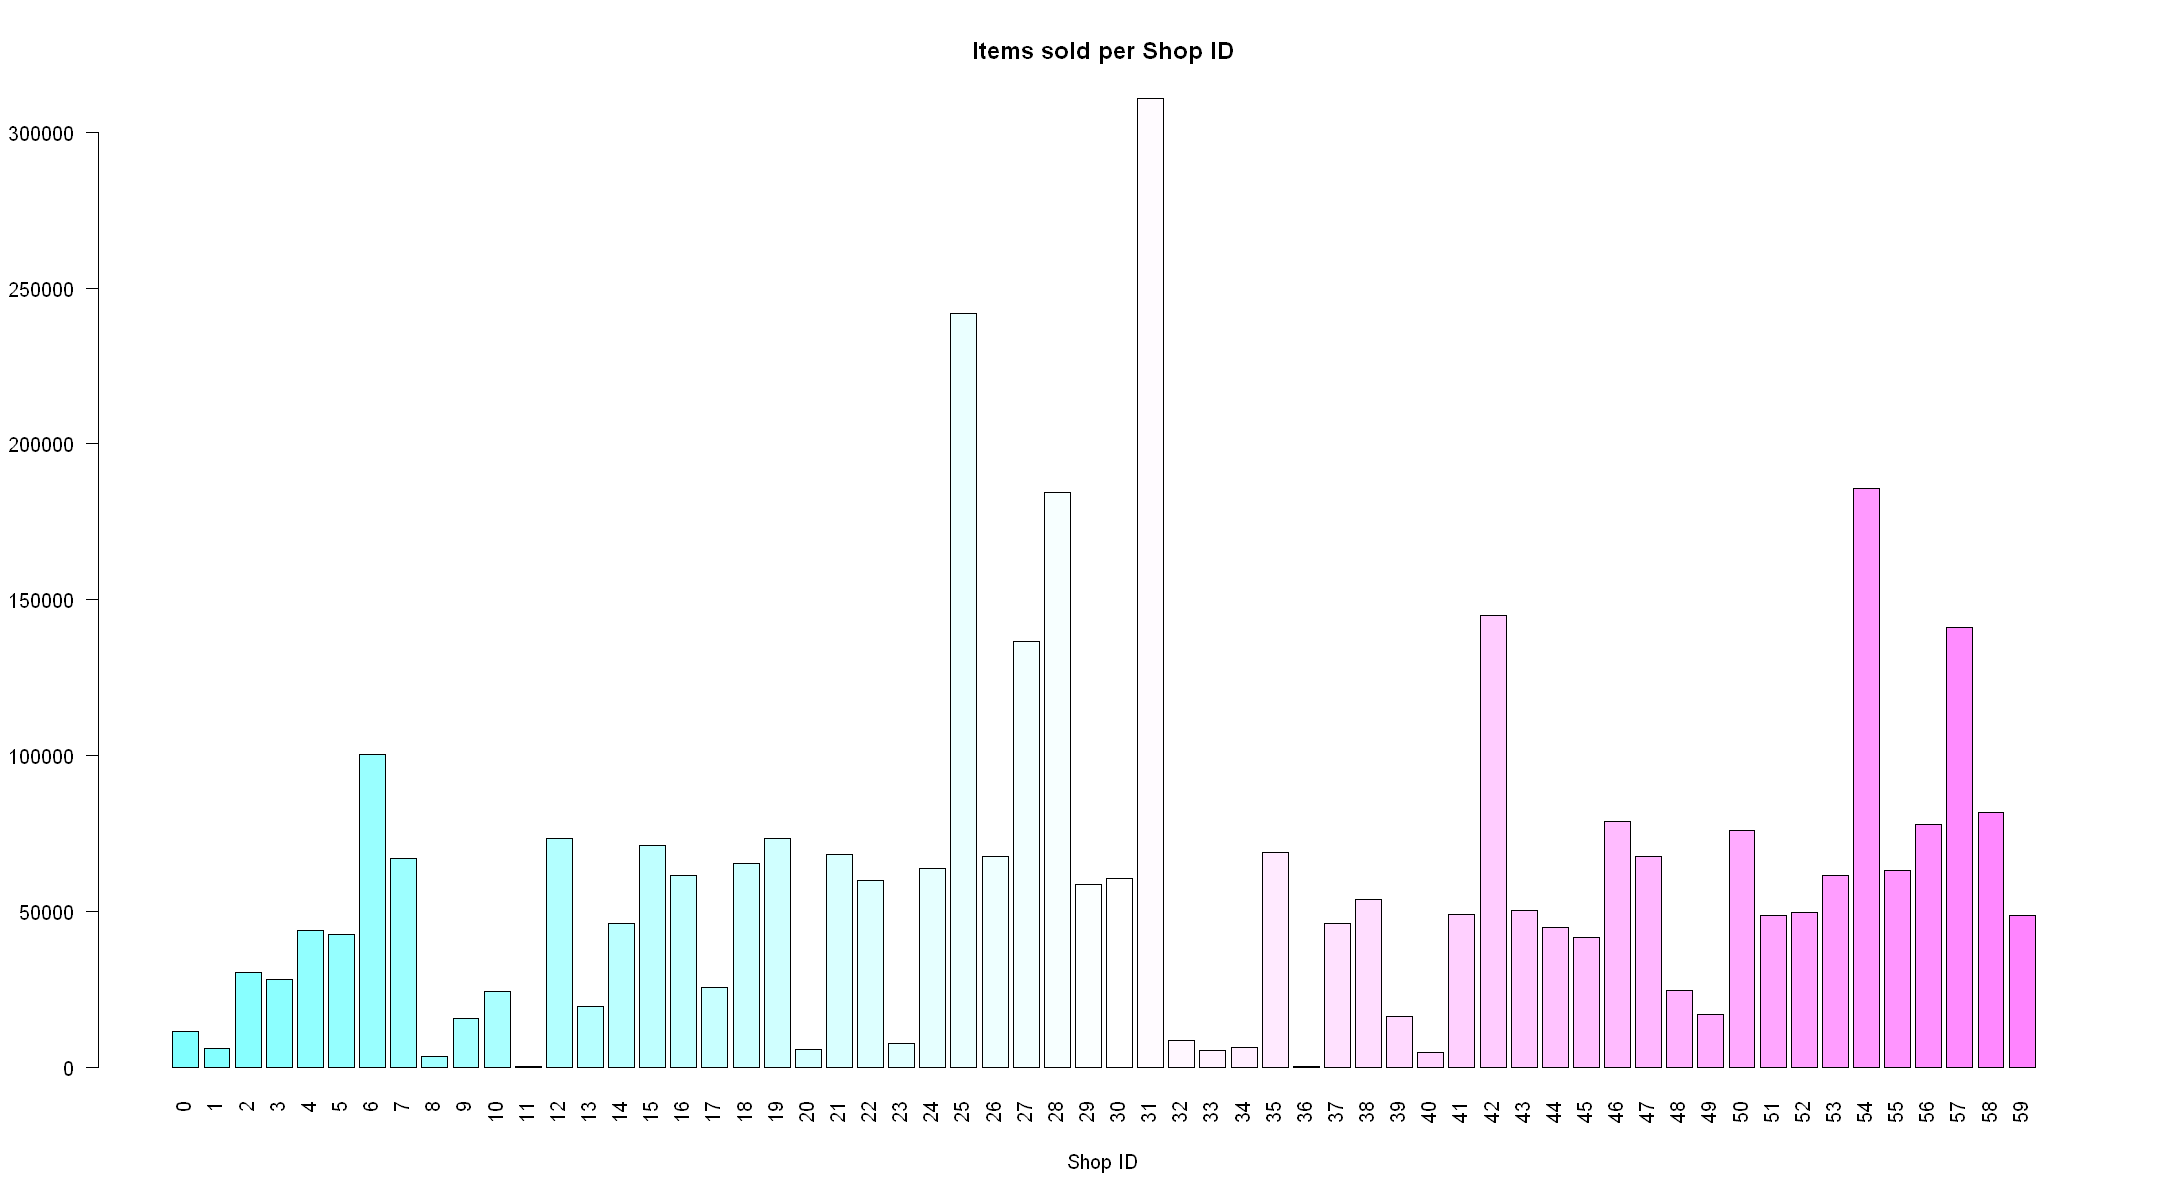

In [7]:
options(repr.plot.width=18, repr.plot.height=10)
barplot(df[,2] ~ df[,1],type="h",ylab="",xlab="Shop ID",main="Items sold per Shop ID",las=2,cex.names=1,col=cm.colors(61))
cat('\nShop ID 31 sold the most items based on the histogram:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Generating a dataframe to view monthly sales</p>

In [8]:
months <- sort(unique(sales_Data$date_block_num))
df2 <-c()
for(month in months){   
    df2<-rbind(df2,c(month,sum(sales_Data[which(sales_Data$date_block_num==month), 6])))
#     cat(shop,"\t",df,"\n")
}
head(df2)
summary(df2)

[,1] [,2]  
[1,] 0    131479
[2,] 1    128090
[3,] 2    147142
[4,] 3    107190
[5,] 4    106970
[6,] 5    125381

       V1              V2        
 Min.   : 0.00   Min.   : 63187  
 1st Qu.: 8.25   1st Qu.: 85969  
 Median :16.50   Median :107306  
 Mean   :16.50   Mean   :107300  
 3rd Qu.:24.75   3rd Qu.:125359  
 Max.   :33.00   Max.   :183342  

Warning message in plot.window(xlim, ylim, log = log, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
"graphical parameter "type" is obsolete"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
"graphical parameter "type" is obsolete"



The months that the most sales are 12 and 24:

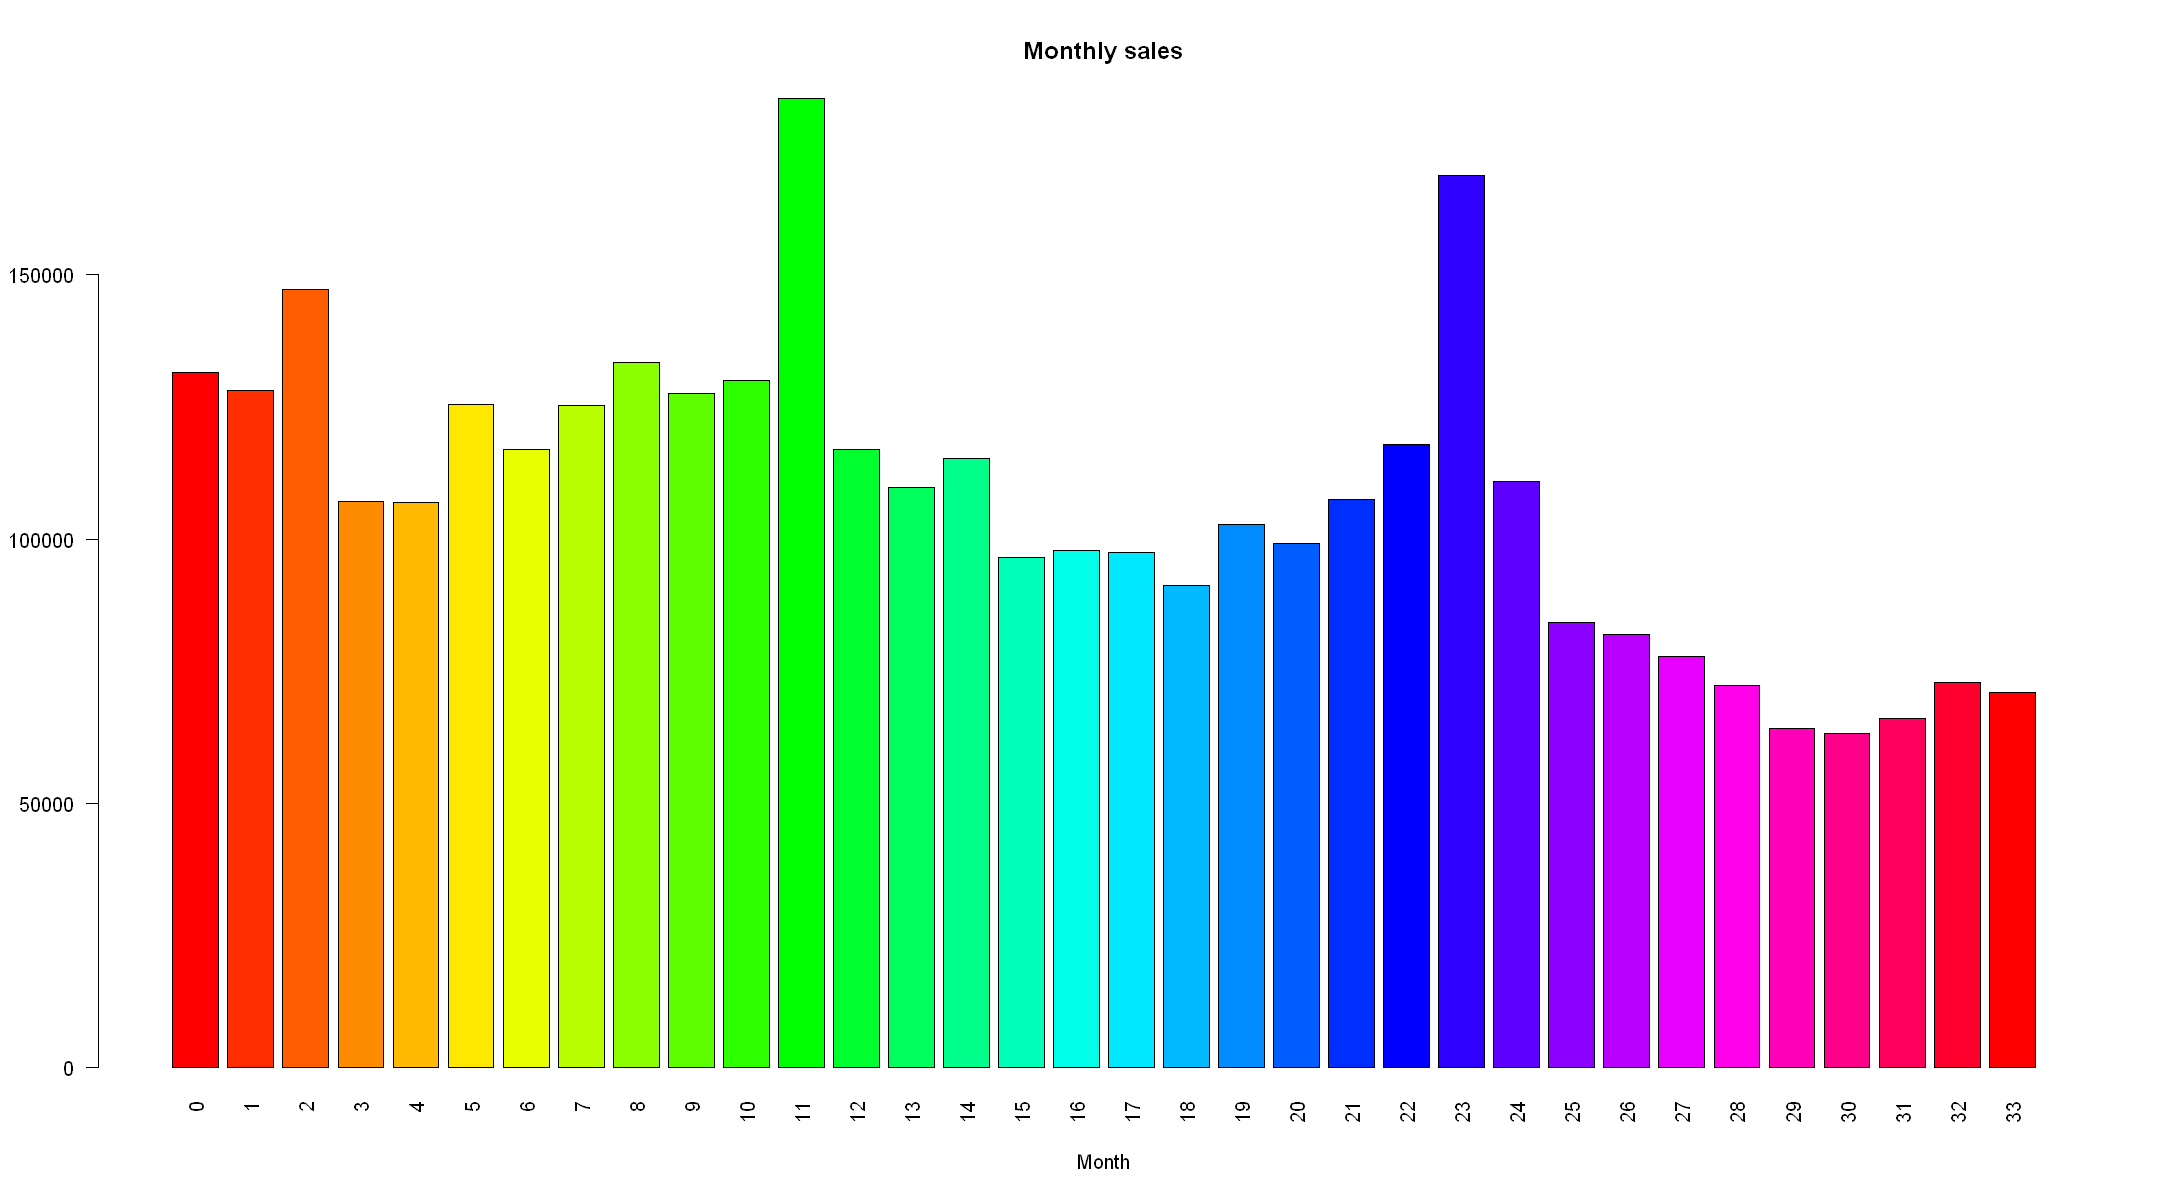

In [9]:
options(repr.plot.width=18, repr.plot.height=10)
barplot(df2[,2] ~ df2[,1],type="h",ylab="",xlab="Month",main="Monthly sales",las=2,cex.names=1,col=rainbow(33))
cat('\nThe months that the most sales are 12 and 24:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Exploring the item prices vs ID</p>


There are a couple of items that are above all the others, we will consider this an outlier:

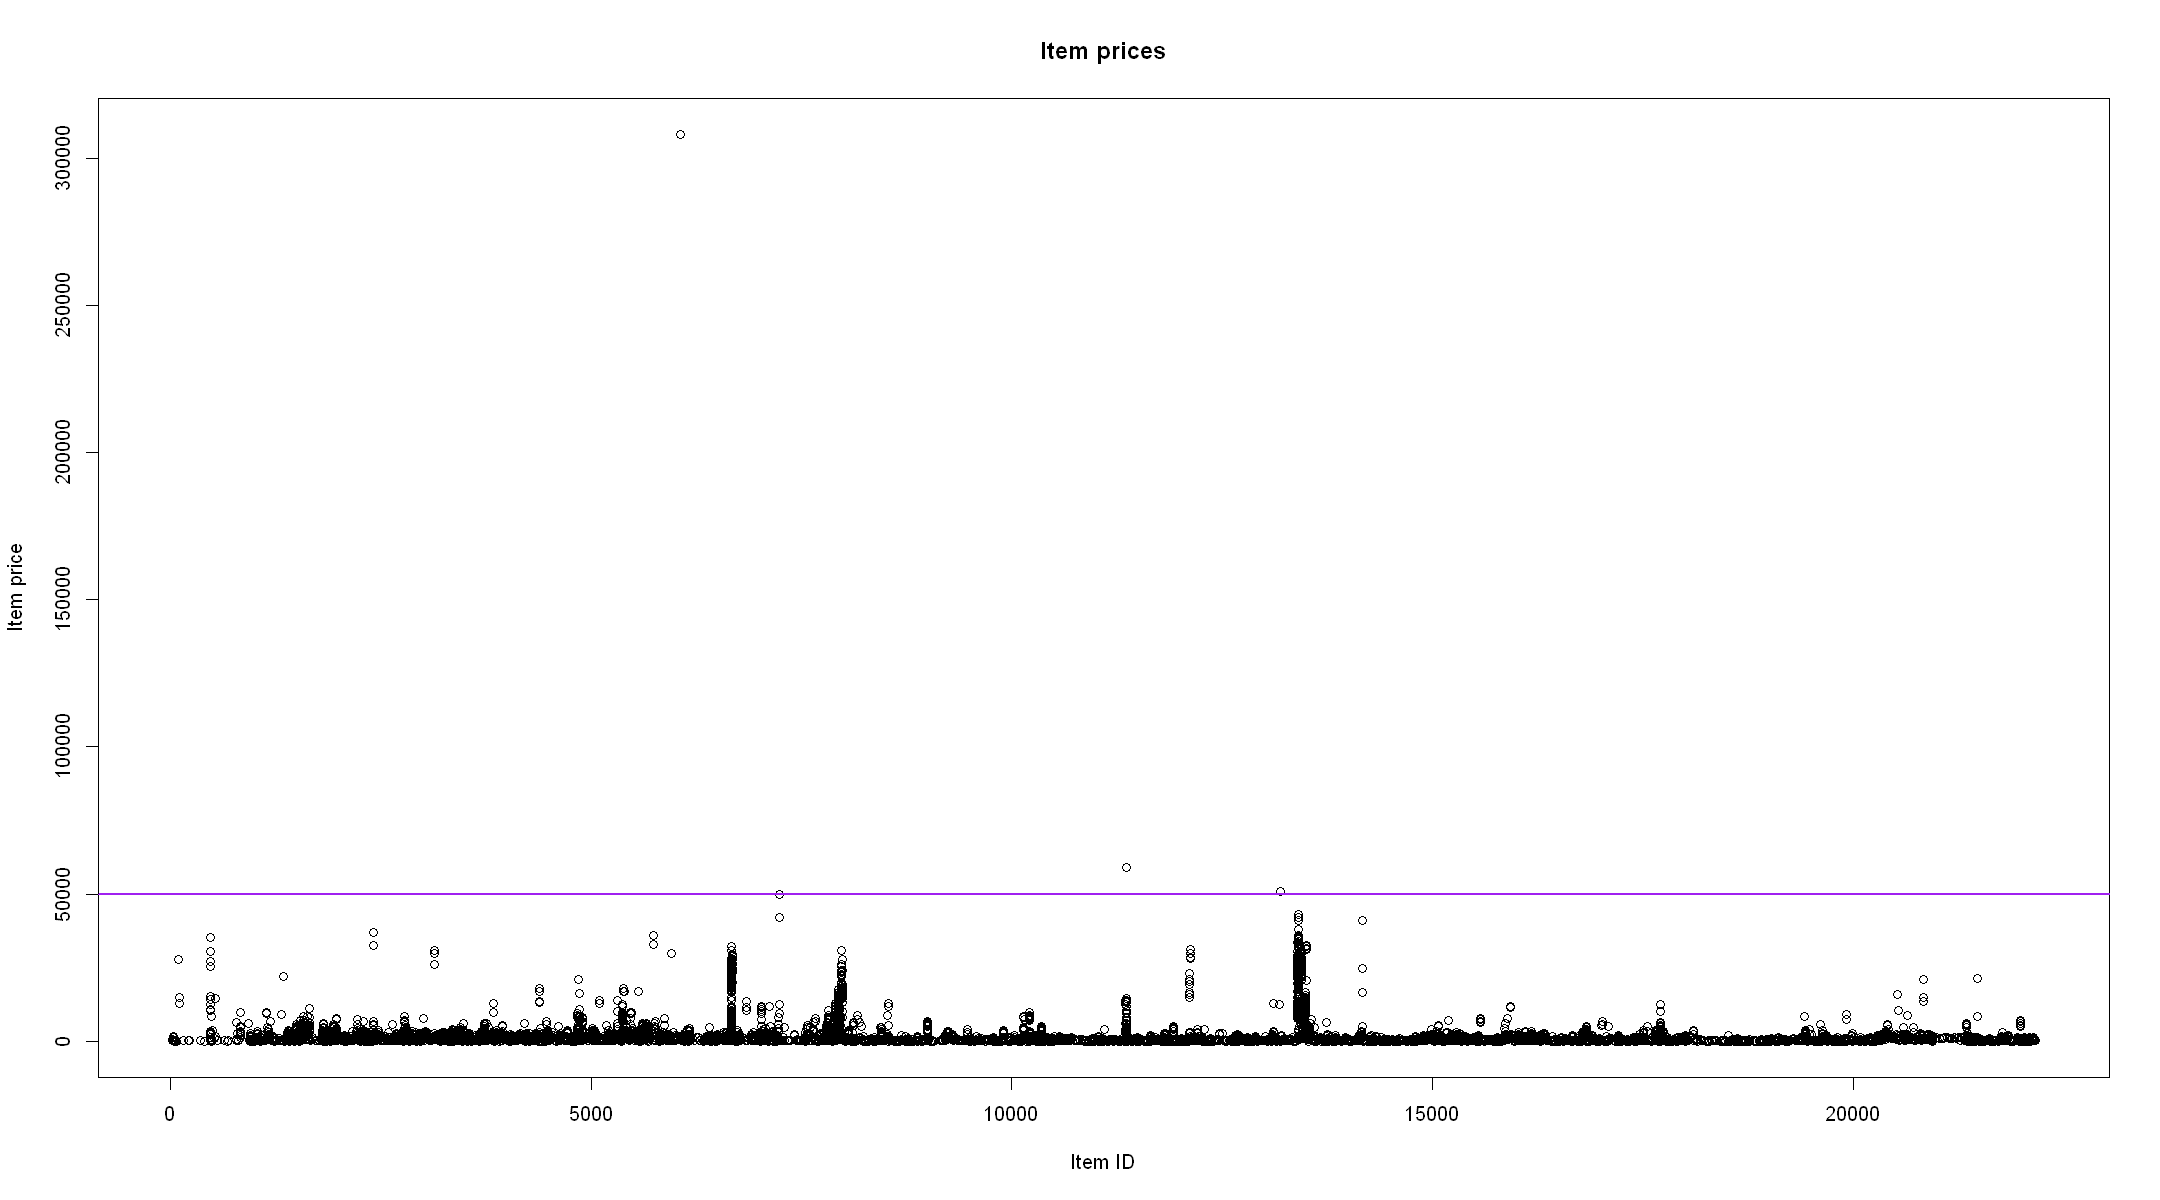

In [10]:
# Removing duplicated item prices from dataframe
unique_sales_data <- sales_Data[!duplicated(sales_Data$item_price), ]
plot(unique_sales_data$item_id, unique_sales_data$item_price,ylab="Item price",xlab="Item ID",main="Item prices")
abline(h=c(50000), lwd=2, col="purple")
cat('\nThere are a couple of items that are above all the others, we will consider this an outlier:')

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Removing duplicate shop IDs as well as outliers</p>

In [11]:
# This will be our base dataset, from which we can modify features as needed
train_daily<-sales_Data%>%inner_join(itemsData,by = "item_id")%>%filter((item_price<45000)&(item_cnt_day < 1000)&(item_price > 0) & (item_cnt_day >= 0))%>%transmute(date,date_block_num,shop_id,item_category_id, item_id, item_price, item_cnt_day,revenue=item_price*item_cnt_day)
train_daily[train_daily['shop_id'] == 0, 'shop_id'] = 57
train_daily[train_daily['shop_id']== 1, 'shop_id'] = 58
train_daily[train_daily['shop_id'] == 11, 'shop_id'] = 10
train_daily[train_daily['shop_id'] == 40, 'shop_id'] = 39
head(train_daily)

date       date_block_num shop_id item_category_id item_id item_price
1 2013-01-01 0              19      40               18976   399       
2 2013-01-01 0              19      55               18284   199       
3 2013-01-01 0              19      55               18320   199       
4 2013-01-01 0              19      55               18329   299       
5 2013-01-01 0              19      62               19367   399       
6 2013-01-01 0              19      40               18823   299       
  item_cnt_day revenue
1 1            399    
2 1            199    
3 1            199    
4 1            299    
5 1            399    
6 1            299

In [34]:
train_monthly<-train_daily%>%transmute(date_block_num,shop_id, item_category_id, item_id,item_cnt_day,item_price,revenue)%>%group_by(date_block_num,shop_id, item_category_id, item_id)%>%summarize(item_cnt_month=sum(item_cnt_day),mean_item_cnt=mean(item_cnt_day),mean_item_price=mean(item_price),revenue_month=sum(revenue))
head(train_monthly)

`summarise()` has grouped output by 'date_block_num', 'shop_id', 'item_category_id'. You can override using the
`.groups` argument.


date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              2       2                5572    9              1.285714     
2 0              2       2                5573    2              1.000000     
3 0              2       2                5575    4              1.000000     
4 0              2       2                5576    3              1.000000     
5 0              2       2                5632    1              1.000000     
6 0              2       2                5633    1              1.000000     
  mean_item_price revenue_month
1 1532.857        13910.00     
2  924.000         1848.00     
3  955.005         3820.02     
4 2490.000         7470.00     
5 2390.000         2390.00     
6 2298.000         2298.00

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Our test data will be assigned to date_block_num 34, we are now moving this into its own dataframe</p>

In [13]:
testData["date_block_num"] <- 34
head(testData)

ID shop_id item_id date_block_num
1 0  5       5037    34            
2 1  5       5320    34            
3 2  5       5233    34            
4 3  5       5232    34            
5 4  5       5268    34            
6 5  5       5039    34

In [35]:
shop_ids<-unique(testData[,'shop_id'])
item_ids<-unique(testData[,'item_id'])
months<-0:33
# Creating a dataframe using expand.grid function
empty_df<-expand.grid(date_block_num=months,shop_id=shop_ids,item_id=item_ids)
# empty_df
# tail(empty_df)
# summary(empty_df)
# nrow(empty_df)
empty_df<-rbind(empty_df,testData[,c('date_block_num','shop_id','item_id')])
head(empty_df)
summary(empty_df)
# nrow(empty_df)

date_block_num shop_id item_id
1 0              5       5037   
2 1              5       5037   
3 2              5       5037   
4 3              5       5037   
5 4              5       5037   
6 5              5       5037

 date_block_num    shop_id         item_id     
 Min.   : 0     Min.   : 2.00   Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.: 5382  
 Median :17     Median :34.50   Median :11203  
 Mean   :17     Mean   :31.64   Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :22167  

In [36]:
# Joining remaining rows from our train_monthly dataframe into our empty_df dataframe and overriding train_monthly for final dataframe
train_monthly<-empty_df%>%left_join(train_monthly,by=c('date_block_num','shop_id','item_id'))
# Eliminating any NA data in our dataframe
train_monthly[is.na(train_monthly)]<-0
# Joining all rows from our items dataframe
train_monthly<-train_monthly[,c('date_block_num','shop_id','item_id','item_cnt_month','mean_item_cnt','mean_item_price','revenue_month')]%>%inner_join(itemsData,by = "item_id")
# Adding remaining columns
train_monthly<-train_monthly[,c('date_block_num','shop_id','item_category_id','item_id','item_cnt_month','mean_item_cnt','mean_item_price','revenue_month')]
# train_monthly['item_cnt_month']<-lapply(train_monthly['item_cnt_month'],function(x){if (x>20) 20 else(if(x<0) 0 else x)})
train_monthly['item_cnt_month']<-lapply(train_monthly['item_cnt_month'],function(x){ifelse(x>20,20,x)})
train_monthly['month']<-train_monthly['date_block_num']%%12
head(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month
1 0               0             0    
2 0               0             1    
3 0               0             2    
4 0               0             3    
5 0               0             4    
6 0               0             5

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Calculating the average items sold per store to add to our train_monthly dataframe</p>

In [37]:
date_block_shop_mean<-train_monthly%>%group_by(date_block_num,shop_id)%>%summarize(date_block_shop_mean=mean(item_cnt_month))
head(date_block_shop_mean)
train_monthly<-train_monthly%>%left_join(date_block_shop_mean,by=c('date_block_num', 'shop_id'))

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num shop_id date_block_shop_mean
1 0              2       0.04901961          
2 0              3       0.03666667          
3 0              4       0.08901961          
4 0              5       0.00000000          
5 0              6       0.15862745          
6 0              7       0.10882353

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Calculating the average items sold per month to add to our train_monthly dataframe</p>

In [38]:
date_block_item_mean<-train_monthly%>%group_by(date_block_num,item_id)%>%summarize(date_block_item_mean=mean(item_cnt_month))
head(date_block_item_mean)
train_monthly<-train_monthly%>%left_join(date_block_item_mean,by=c('date_block_num', 'item_id'))
train_monthly[is.na(train_monthly)]<-0

`summarise()` has grouped output by 'date_block_num'. You can override using the `.groups` argument.


date_block_num item_id date_block_item_mean
1 0              30      0.00000000          
2 0              31      0.00000000          
3 0              32      4.50000000          
4 0              33      1.07142857          
5 0              38      0.00000000          
6 0              42      0.04761905

In [39]:
head(train_monthly)
summary(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean date_block_item_mean
1 0               0             0     0.00000000           0                   
2 0               0             1     0.03666667           0                   
3 0               0             2     0.07098039           0                   
4 0               0             3     0.04941176           0                   
5 0               0             4     0.05823529           0                   
6 0               0             5     0.06686275           0

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month    mean_item_cnt      mean_item_price    revenue_month    
 Min.   : 0.0000   Min.   :  0.0000   Min.   :    0.00   Min.   :      0  
 1st Qu.: 0.0000   1st Qu.:  0.0000   1st Qu.:    0.00   1st Qu.:      0  
 Median : 0.0000   Median :  0.0000   Median :    0.00   Median :      0  
 Mean   : 0.1837   Mean   :  0.0879   Mean   :   73.12   Mean   :    230  
 3rd Qu.: 0.0000   3rd Qu.:  0.0000   3rd Qu.:    0.00   3rd Qu.:      0  
 Max.   :20.0000   Max.   :500.0000   Max.   :42990.00   Max.   :6264230  
     month        da

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Normalizing our data</p>

In [40]:
minMax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
y_min<-min(train_monthly$item_cnt_month)
y_max<-max(train_monthly$item_cnt_month)
#Applying our normalize function to columns 5 to 11, these are the columns that 
#contain the features that can be used in our model
train_monthly[,5:11]<-apply(train_monthly[,5:11],2,minMax)

In [41]:
#Verifying the normalization of our data
head(train_monthly)
cat('\n\n----------------------------------------------------------------------------------------')
summary(train_monthly)
cat('\n- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.')

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month      date_block_shop_mean
1 0               0             0.00000000 0.00000000          
2 0               0             0.09090909 0.02315503          
3 0               0             0.18181818 0.04482417          
4 0               0             0.27272727 0.03120357          
5 0               0             0.36363636 0.03677563          
6 0               0             0.45454545 0.04222387          
  date_block_item_mean
1 0                   
2 0                   
3 0                   
4 0                   
5 0                   
6 0



----------------------------------------------------------------------------------------

 date_block_num    shop_id      item_category_id    item_id     
 Min.   : 0     Min.   : 2.00   Min.   : 0.00    Min.   :   30  
 1st Qu.: 8     1st Qu.:16.00   1st Qu.:37.00    1st Qu.: 5382  
 Median :17     Median :34.50   Median :43.00    Median :11203  
 Mean   :17     Mean   :31.64   Mean   :46.31    Mean   :11019  
 3rd Qu.:26     3rd Qu.:47.00   3rd Qu.:58.00    3rd Qu.:16072  
 Max.   :34     Max.   :59.00   Max.   :83.00    Max.   :22167  
 item_cnt_month     mean_item_cnt       mean_item_price    revenue_month     
 Min.   :0.000000   Min.   :0.0000000   Min.   :0.000000   Min.   :0.00e+00  
 1st Qu.:0.000000   1st Qu.:0.0000000   1st Qu.:0.000000   1st Qu.:0.00e+00  
 Median :0.000000   Median :0.0000000   Median :0.000000   Median :0.00e+00  
 Mean   :0.009182   Mean   :0.0001757   Mean   :0.001701   Mean   :3.68e-05  
 3rd Qu.:0.000000   3rd Qu.:0.0000000   3rd Qu.:0.000000   3rd Qu.:0.00e+00  
 Max.   :1.000000   Max.   :1.0000000   Max.   :1.000000   Max.   :1.00e+00  


- We now see that our max values are 1 for all our features, in comparison to our previous summary that had values greater than 1.

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">- First run of a linear regression model using standardized features and no added features.</p>

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Separating my testing, valid and training data</p>

In [42]:
test_dataset <- train_monthly[which(train_monthly$date_block_num == 34),]
head(test_dataset)

date_block_num shop_id item_category_id item_id item_cnt_month
7282801 34             5       19               5037    0             
7282802 34             5       55               5320    0             
7282803 34             5       19               5233    0             
7282804 34             5       23               5232    0             
7282805 34             5       20               5268    0             
7282806 34             5       23               5039    0             
        mean_item_cnt mean_item_price revenue_month month    
7282801 0             0               0             0.9090909
7282802 0             0               0             0.9090909
7282803 0             0               0             0.9090909
7282804 0             0               0             0.9090909
7282805 0             0               0             0.9090909
7282806 0             0               0             0.9090909
        date_block_shop_mean date_block_item_mean
7282801 0                    0                   
7282802 0                    0                   
7282803 0                    0                   
7282804 0                    0                   
7282805 0                    0                   
7282806 0                    0

In [43]:
train_monthly <- train_monthly[which(train_monthly$date_block_num != 34),]
tail(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month
7282795 28             45      37               969     0             
7282796 29             45      37               969     0             
7282797 30             45      37               969     0             
7282798 31             45      37               969     0             
7282799 32             45      37               969     0             
7282800 33             45      37               969     0             
        mean_item_cnt mean_item_price revenue_month month    
7282795 0             0               0             0.3636364
7282796 0             0               0             0.4545455
7282797 0             0               0             0.5454545
7282798 0             0               0             0.6363636
7282799 0             0               0             0.7272727
7282800 0             0               0             0.8181818
        date_block_shop_mean date_block_item_mean
7282795 0.07491332           0.00250             
7282796 0.06636949           0.00125             
7282797 0.06996038           0.00250             
7282798 0.08098068           0.00125             
7282799 0.07763744           0.00625             
7282800 0.08259039           0.00375

In [44]:
# Using dlpyr sample_frac() function, we are separating the dataset randomly, using 80% for training and 20% for validating
training_dataset  <- train_monthly %>% dplyr::sample_frac(0.8)
cat('\n -------------------------------------- TRAINING DATASET --------------------------------------')
head (training_dataset)
# print ("Testing Dataset")
valid_dataset   <- dplyr::anti_join(train_monthly,training_dataset)
cat('\n -------------------------------------- VALIDATING DATASET --------------------------------------')
head (testing_dataset)


 -------------------------------------- TRAINING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 31             41      40               21612   0              0            
2  7             37      58                2232   0              0            
3 27             31      31               16396   0              0            
4 15             58      30                1783   0              0            
5 24             58      58                6798   0              0            
6 11             45      58                5063   0              0            
  mean_item_price revenue_month month     date_block_shop_mean
1 0               0             0.6363636 0.10339277          
2 0               0             0.6363636 0.05411095          
3 0               0             0.2727273 0.54853888          
4 0               0             0.2727273 0.13261516          
5 0               0             0.0000000 0.21830114          
6 0               0             1.0000000 0.10834572          
  date_block_item_mean
1 0.01125             
2 0.00000             
3 0.00000             
4 0.00000             
5 0.00875             
6 0.00500

Joining, by = c("date_block_num", "shop_id", "item_category_id", "item_id", "item_cnt_month", "mean_item_cnt",
"mean_item_price", "revenue_month", "month", "date_block_shop_mean", "date_block_item_mean")



 -------------------------------------- VALIDATING DATASET --------------------------------------

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1  1             5       19               5037    0.00           0.000        
2  2             5       19               5037    0.00           0.000        
3 19             5       19               5037    0.00           0.000        
4 20             5       19               5037    0.05           0.002        
5 27             5       19               5037    0.00           0.000        
6  0             4       19               5037    0.00           0.000        
  mean_item_price revenue_month month      date_block_shop_mean
1 0.00000000      0.0000000000  0.09090909 0.02315503          
2 0.00000000      0.0000000000  0.18181818 0.04482417          
3 0.00000000      0.0000000000  0.63636364 0.11243190          
4 0.06045592      0.0004148954  0.72727273 0.09299158          
5 0.00000000      0.0000000000  0.27272727 0.08828628          
6 0.00000000      0.0000000000  0.00000000 0.05621595          
  date_block_item_mean
1 0.00000             
2 0.00000             
3 0.00000             
4 0.22875             
5 0.03125             
6 0.00000

In [45]:
# Initial run of our linear model under the assumption that all features are equally important for our prediction
lm_res <- lm(training_dataset$item_cnt_month~.,data=training_dataset)
summary(lm_res)
cat('\n-------------------------------- Result exploration --------------------------------')


Call:
lm(formula = training_dataset$item_cnt_month ~ ., data = training_dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3556  -0.0034   0.0010   0.0035   0.9499 

Coefficients:
                       Estimate Std. Error  t value Pr(>|t|)    
(Intercept)          -4.345e-03  5.800e-05  -74.922  < 2e-16 ***
date_block_num       -2.494e-04  1.516e-06 -164.447  < 2e-16 ***
shop_id               2.138e-06  7.828e-07    2.731  0.00632 ** 
item_category_id      2.002e-05  8.578e-07   23.337  < 2e-16 ***
item_id               1.834e-08  2.283e-09    8.034 9.44e-16 ***
mean_item_cnt         1.361e+01  1.640e-02  829.584  < 2e-16 ***
mean_item_price       2.735e-01  1.298e-03  210.649  < 2e-16 ***
revenue_month         4.222e+00  1.540e-02  274.251  < 2e-16 ***
month                -1.453e-03  4.684e-05  -31.015  < 2e-16 ***
date_block_shop_mean  5.646e-02  1.475e-04  382.762  < 2e-16 ***
date_block_item_mean  7.615e-01  3.983e-04 1911.949  < 2e-16 ***
---
Signif. codes: 


-------------------------------- Result exploration --------------------------------

Based on what we've learned, we can explore the results of our first model before testing it in Kaggle. 

* p-value : 
Looking at the p-values for our features we can see that almost all features are small, the standard value we are looking for is .05 or lower, meaning, if the p-value for any of our features is less than .05, than it is of importance for our model.

* residuals : 
The residuals are close to 0, the model could be a good fit, we are concerned with the min that is -13 but we will have to check later on to see how this is affecting our results.

* R^2 : 
Our R-squared isn't great, we are looking to get this value close to 1 which will mean that 100% of the observed vairation can be explained by the model's input. In our case, around 60% of our observed variation can be explained by our model's input, we will further explore these results to understand our model/data a bit more.

<p style="font-size:15px;padding:20px;border-style:solid;border-width:0.5px;">Verifying our residuals and checking for any more significant outliers in our current dataset using the cooks.distance() function</p>

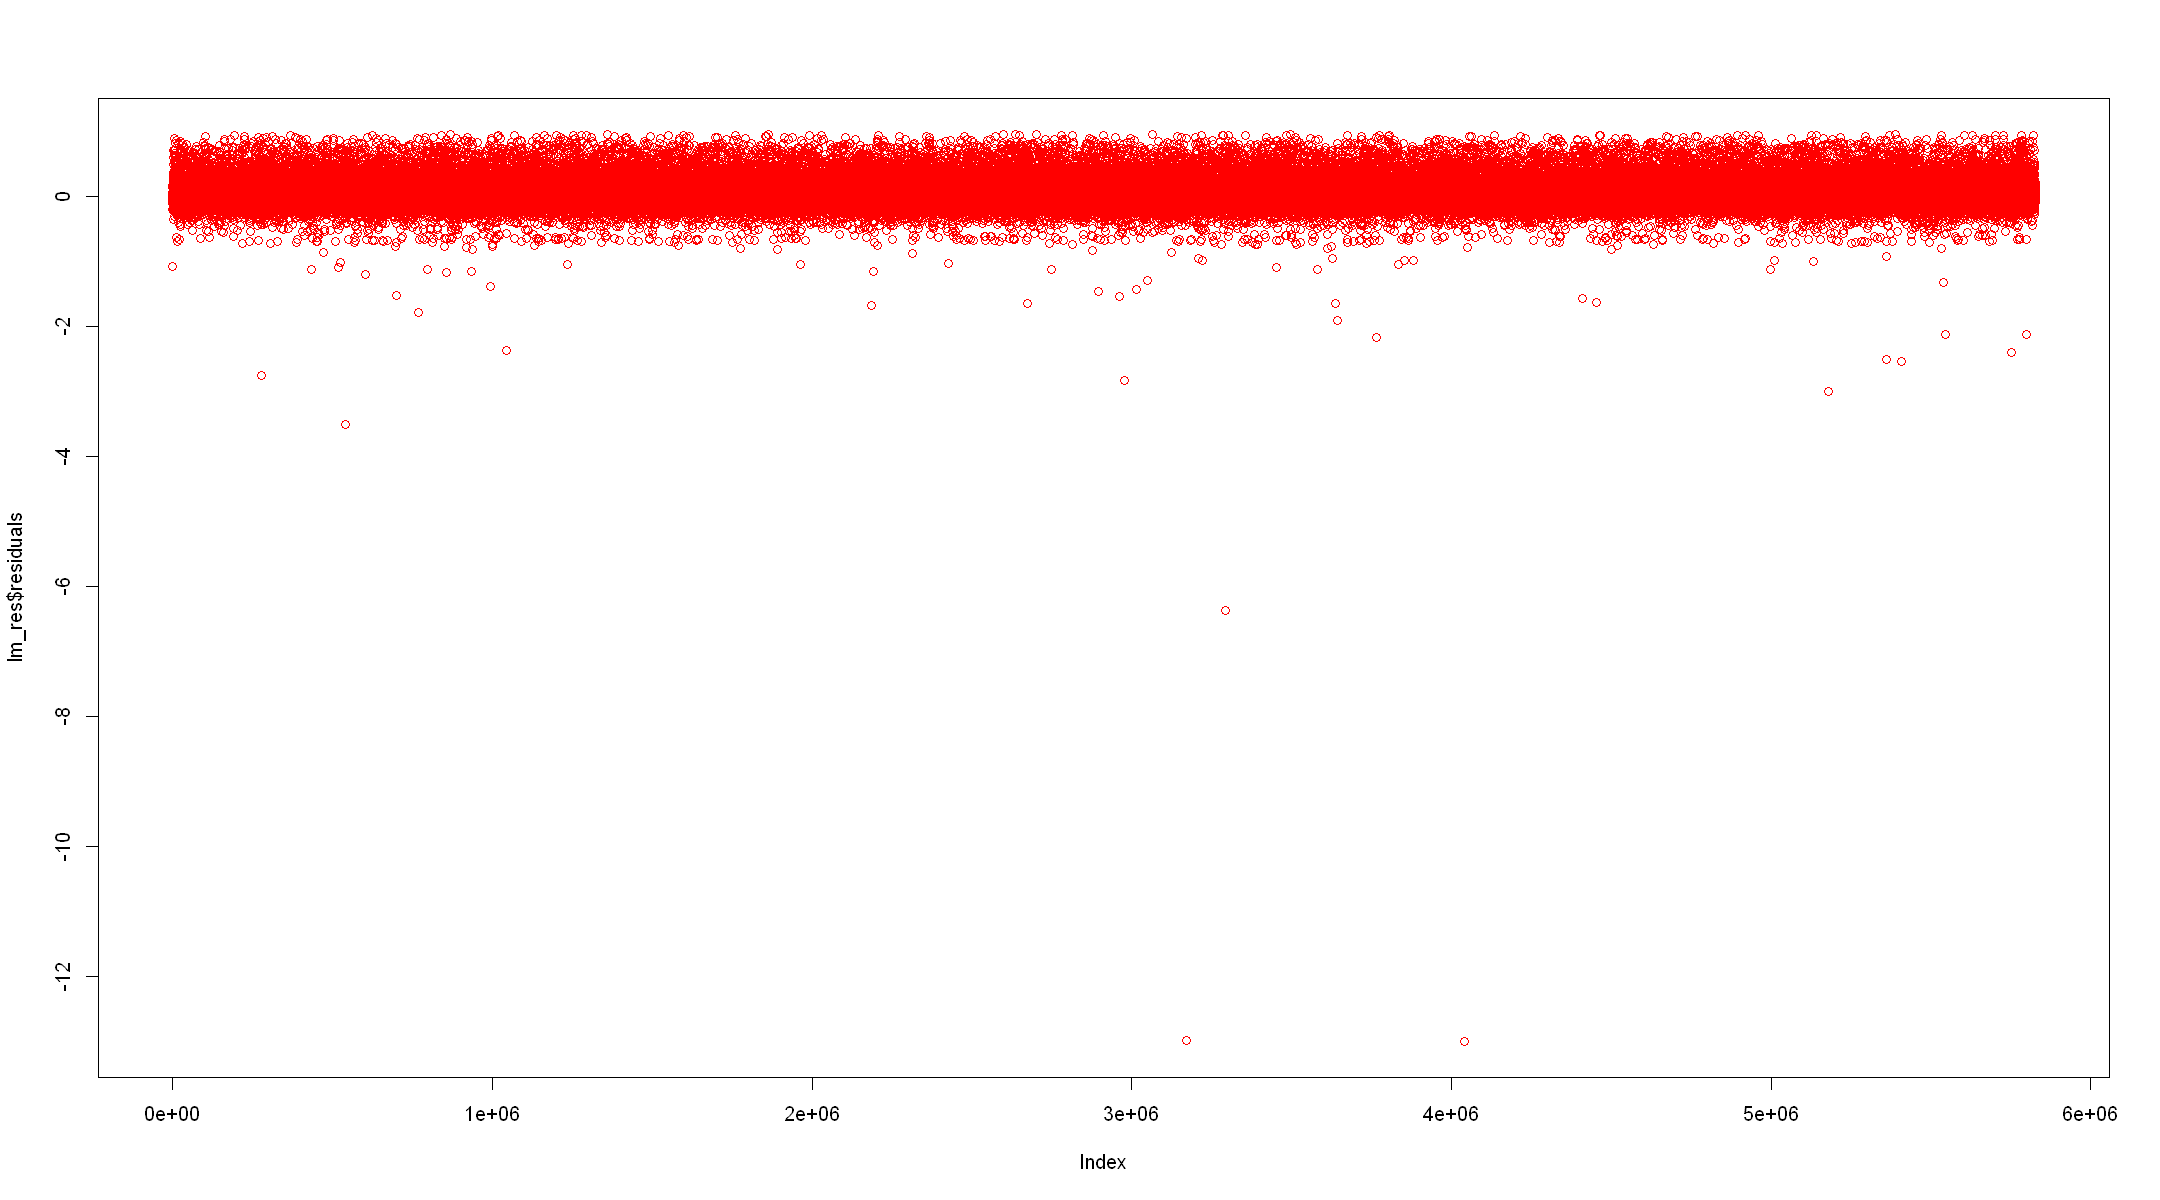

In [32]:
plot(lm_res$residuals, col = "red")

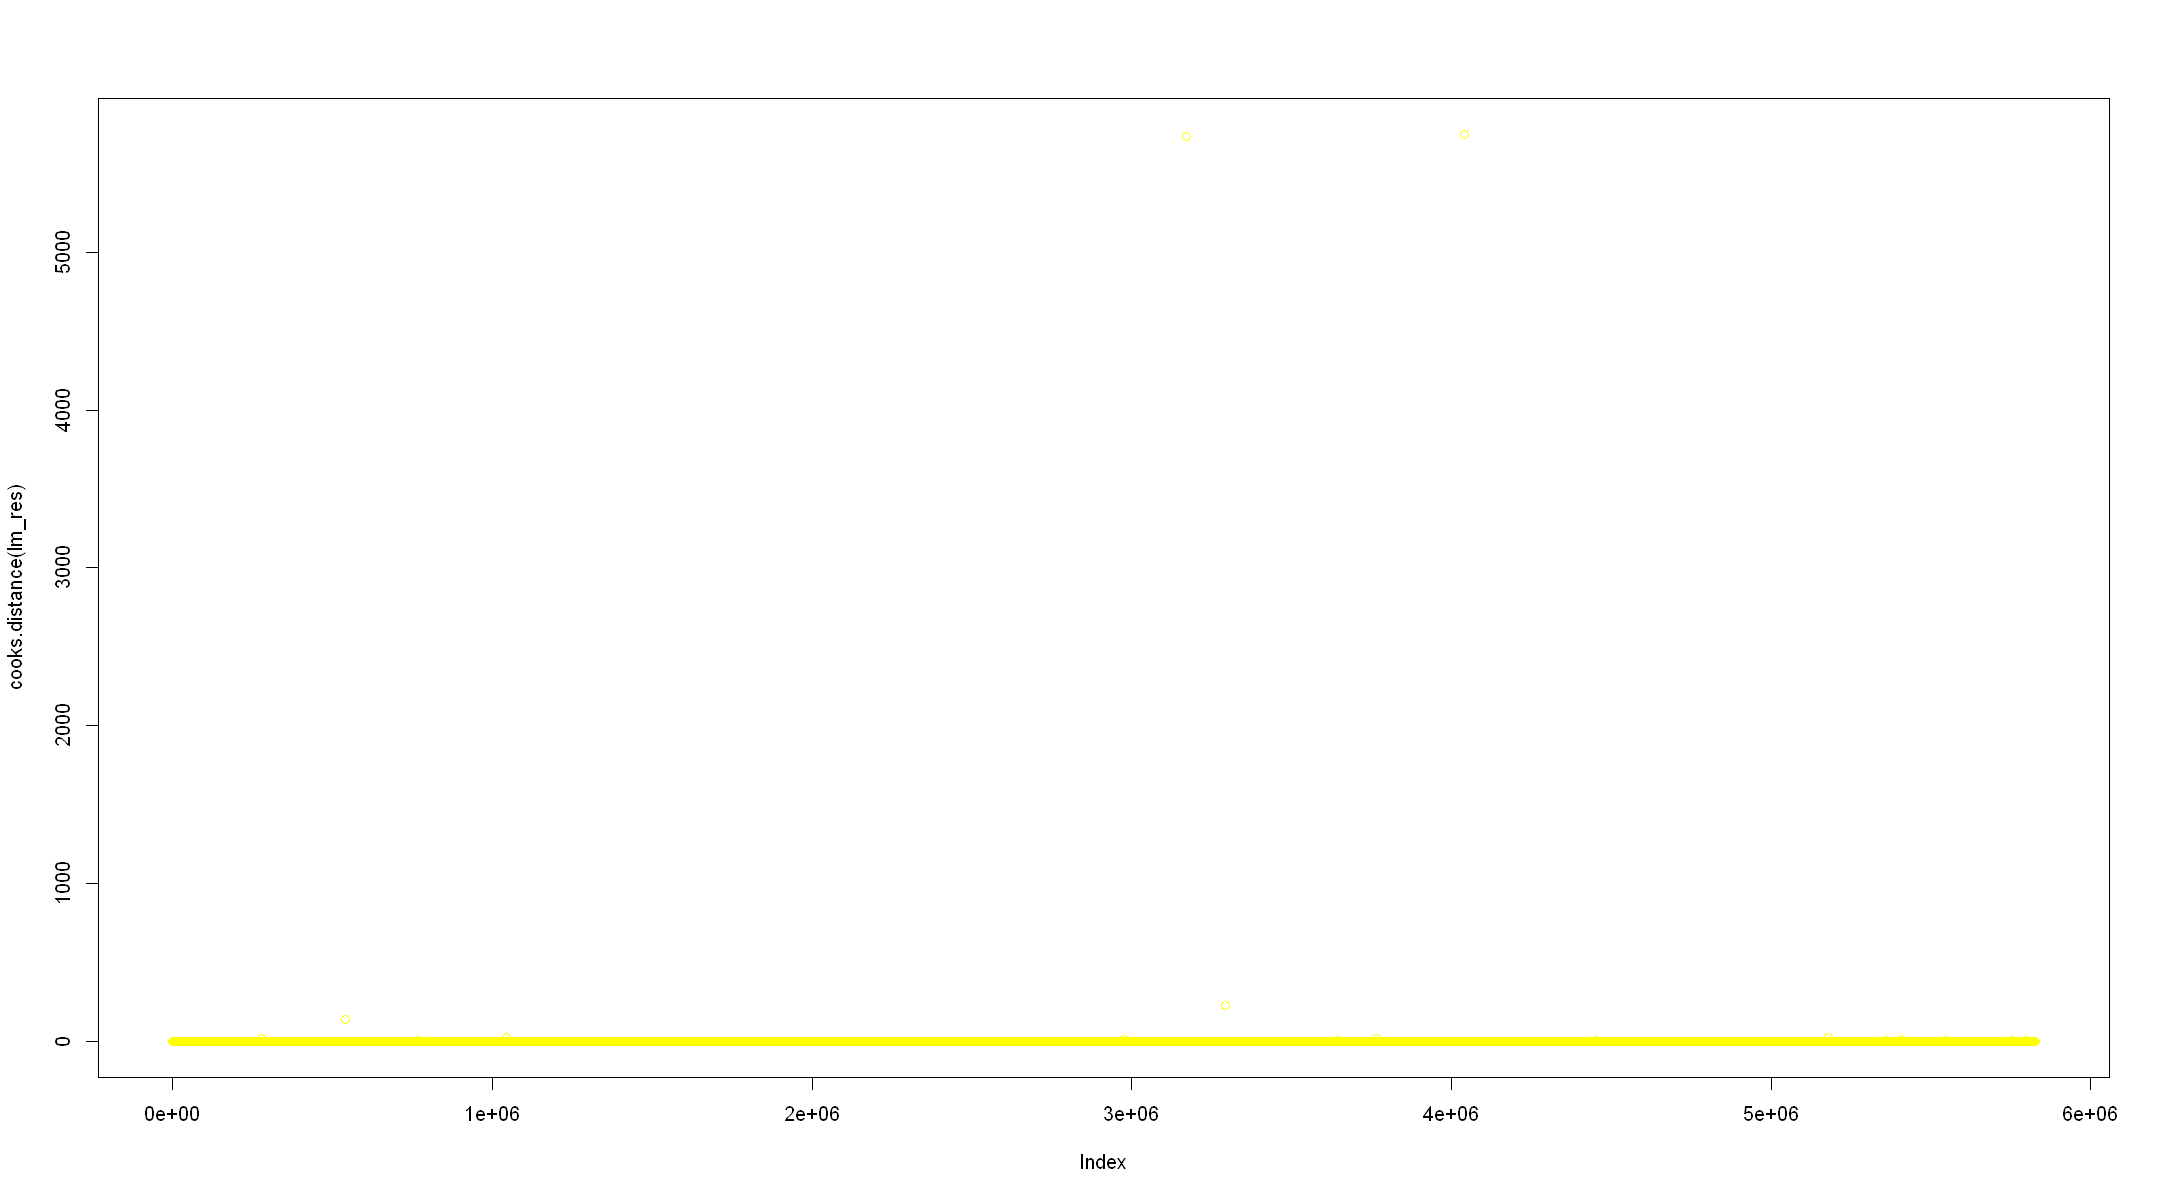

In [33]:
plot(cooks.distance(lm_res), col = "yellow")

Based on the results from our plots, we can tell there are no more outliers in our dataset, we can continue to create features using our base dataset.

In [46]:
first_predict<-predict(lm_res,valid_dataset,interval='confidence')
head(first_predict)

fit          lwr          upr         
1 -0.003913162 -0.003989331 -0.003836993
2 -0.003376423 -0.003453150 -0.003299696
3 -0.004031302 -0.004101171 -0.003961433
4  0.092503140  0.092346872  0.092659409
5  0.108856873  0.108745470  0.108968277
6  0.129387434  0.129269284  0.129505584

In [47]:
cat('- Residuals using our training dataset:\n')
# Residual = square(Observed - Predicted)
mean((training_dataset[,'item_cnt_month']-predict(lm_res, training_dataset))^2)

- Residuals using our training dataset:


[1] 0.001099569

In [48]:
cat('- Residuals using our validating dataset:\n')
mean((valid_dataset[,'item_cnt_month']-predict(lm_res, valid_dataset))^2)

- Residuals using our validating dataset:


[1] 0.00103638

Both our residuals are close to 0, the model seems to be an ok fit despite the R-squared value we got, we will now use it to predict our testing data.

In [56]:
first_predict_final<-predict(lm_res,test_dataset)
first_predict_final

7282801     7282802     7282803     7282804     7282805     7282806 
-0.01366048 -0.01293467 -0.01365688 -0.01357683 -0.01363622 -0.01358037 
    7282807     7282808     7282809     7282810     7282811     7282812 
-0.01364039 -0.01293970 -0.01293469 -0.01364108 -0.01344452 -0.01364402 
    7282813     7282814     7282815     7282816     7282817     7282818 
-0.01294775 -0.01360351 -0.01358347 -0.01366350 -0.01260256 -0.01294645 
    7282819     7282820     7282821     7282822     7282823     7282824 
-0.01344295 -0.01364180 -0.01294573 -0.01366112 -0.01332579 -0.01364623 
    7282825     7282826     7282827     7282828     7282829     7282830 
-0.01342446 -0.01362450 -0.01356443 -0.01398965 -0.01396938 -0.01396905 
    7282831     7282832     7282833     7282834     7282835     7282836 
-0.01396921 -0.01396918 -0.01396916 -0.01396910 -0.01396945 -0.01396899 
    7282837     7282838     7282839     7282840     7282841     7282842 
-0.01396907 -0.01396912 -0.01272487 -0.01272494 -0.01272496 -0.01332584 
    7282843     7282844     7282845     7282846     7282847     7282848 
-0.01332582 -0.01332581 -0.01272526 -0.01272522 -0.01272520 -0.01272518 
    7282849     7282850     7282851     7282852     7282853     7282854 
-0.01272516 -0.01272502 -0.01272500 -0.01272498 -0.01293212 -0.01272515 
    7282855     7282856     7282857     7282858     7282859     7282860 
-0.01346424 -0.01344612 -0.01369158 -0.01361148 -0.01369142 -0.01367138 
    7282861     7282862     7282863     7282864     7282865     7282866 
-0.01361131 -0.01361109 -0.01369114 -0.01346780 -0.01346778 -0.01296675 
    7282867     7282868     7282869     7282870     7282871     7282872 
-0.01360537 -0.01360535 -0.01358532 -0.01368525 -0.01296614 -0.01359128 
    7282873     7282874     7282875     7282876     7282877     7282878 
-0.01365168 -0.01347158 -0.01351022 -0.01367034 -0.01292290 -0.01347022 
    7282879     7282880     7282881     7282882     7282883     7282884 
-0.01361001 -0.01360966 -0.01346952 -0.01368969 -0.01366966 -0.01358924 
    7282885     7282886     7282887     7282888     7282889     7282890 
-0.01359495 -0.01359488 -0.01359486 -0.01295692 -0.01345287 -0.01345276 
    7282891     7282892     7282893     7282894     7282895     7282896 
-0.01359273 -0.01367276 -0.01345225 -0.01359229 -0.01365069 -0.01295077 
    7282897     7282898     7282899     7282900     7282901     7282902 
-0.01357275 -0.01359503 -0.01361517 -0.01368441 -0.01366438 -0.01366395 
    7282903     7282904     7282905     7282906     7282907     7282908 
-0.01360245 -0.01358240 -0.01360236 -0.01296198 -0.01296075 -0.01366080 
    7282909     7282910     7282911     7282912     7282913     7282914 
-0.01295949 -0.01295917 -0.01365852 -0.01359846 -0.01367851 -0.01365847 
    7282915     7282916     7282917     7282918     7282919     7282920 
-0.01367531 -0.01356161 -0.01317978 -0.01292216 -0.01256041 -0.01255933 
    7282921     7282922     7282923     7282924     7282925     7282926 
-0.01255968 -0.01255964 -0.01255962 -0.01255949 -0.01255946 -0.01255942 
    7282927     7282928     7282929     7282930     7282931     7282932 
-0.01255975 -0.01316679 -0.01286646 -0.01322446 -0.01251828 -0.01315834 
    7282933     7282934     7282935     7282936     7282937     7282938 
-0.01338563 -0.01338561 -0.01255936 -0.01313573 -0.01313571 -0.01313569 
    7282939     7282940     7282941     7282942     7282943     7282944 
-0.01313565 -0.01313563 -0.01317380 -0.01317371 -0.01287286 -0.01317308 
    7282945     7282946     7282947     7282948     7282949     7282950 
-0.01267027 -0.01267025 -0.01267023 -0.01286949 -0.01286919 -0.01258186 
    7282951     7282952     7282953     7282954     7282955     7282956 
-0.01314740 -0.01317295 -0.01354573 -0.01320293 -0.01312262 -0.01314214 
    7282957     7282958     7282959     7282960     7282961     7282962 
-0.01320214 -0.01320208 -0.01320137 -0.01314122 -0.01314089 -0.01320309 
    7282963     7282964     7282965     7282966     7282967   

In [50]:
cat('- Residuals using our testing dataset:\n')
mean((test_dataset[,'item_cnt_month']-first_predict_final)^2)

- Residuals using our testing dataset:


[1] 0.0001677755

In [57]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = first_predict_final)
head(results)

ID item_cnt_month
7282801 0  -0.01366048   
7282802 1  -0.01293467   
7282803 2  -0.01365688   
7282804 3  -0.01357683   
7282805 4  -0.01363622   
7282806 5  -0.01358037

In [58]:
write.csv(results,file="results/final_results/data_.csv",row.names = FALSE)

Our initial result:
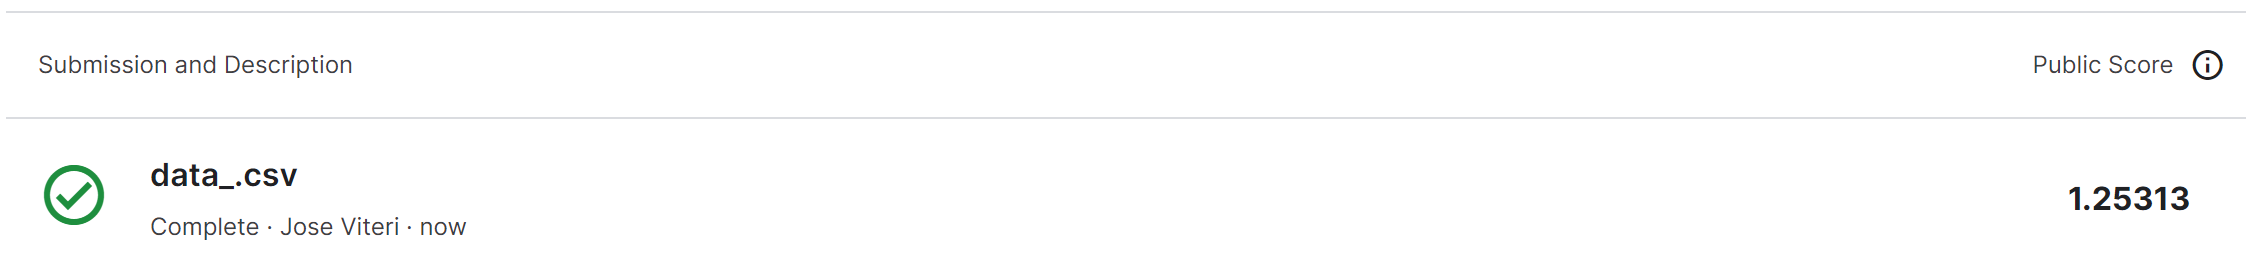

Our score isn't great but this is a start for testing purposes.

<p style="background-color:rgb(20,21,24);color:rgb(255,255,255);font-size:20px;letter-spacing: 3px;padding:20px;border-style:solid;border-width:0.5px;color:grey;">- Steps taken to improve our score and model results:</p>

In [60]:
# norm_train_monthly<-preProcess(train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean')], method=c("range"))
# norm_train_monthly<-norm_train_monthly%>%left_join(train_monthly[,1:4])
norm_train_monthly<-preProcess(as.data.frame(train_dataset[,'item_cnt_month']),method=c("range"))
# head(norm_train_monthly$dim)

In [66]:
norm_train_monthly

Created from 7497000 samples and 1 variables

Pre-processing:
  - ignored (0)
  - re-scaling to [0, 1] (1)


In [14]:
temp<- train_monthly[,c("date_block_num", "shop_id","item_id","item_cnt_month","revenue_month","mean_item_cnt","mean_item_price","date_block_shop_mean","date_block_item_mean")]
for (i in 1:3){
    shifted<-temp
    names(shifted) <-c("date_block_num", "shop_id", "item_id", sprintf("item_cnt_month_lag_%d",i),sprintf("revenue_month_lag_%d",i),sprintf("mean_item_cnt_lag_%d",i),sprintf("mean_item_price_lag_%d",i),sprintf("date_block_shop_mean_lag_%d",i),sprintf("date_block_item_mean_lag_%d",i))
    shifted[,"date_block_num"]<-shifted[,"date_block_num"]+i
    train_monthly<-train_monthly%>%left_join(shifted,by=c('date_block_num','shop_id','item_id'))
}
train_monthly[is.na(train_monthly)]<-0

In [15]:
head(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month date_block_shop_mean ⋯
1 0               0             0     0.00000000           ⋯
2 0               0             1     0.03666667           ⋯
3 0               0             2     0.07098039           ⋯
4 0               0             3     0.04941176           ⋯
5 0               0             4     0.05823529           ⋯
6 0               0             5     0.06686275           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.03666667                
5 0                   0                     0.07098039                
6 0                   0                     0.04941176                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0                          0                    0                  
2 0                          0                    0                  
3 0                          0                    0                  
4 0                          0                    0                  
5 0                          0                    0                  
6 0                          0                    0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.00000000                
5 0                   0                     0.03666667                
6 0                   0                     0.07098039                
  date_block_item_mean_lag_3
1 0                         
2 0                         
3 0                         
4 0                         
5 0                         
6 0

In [16]:
# Normalizing the data
minMax <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
y_min<-min(train_monthly$item_cnt_month)
y_max<-max(train_monthly$item_cnt_month)
train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2','date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2','date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1','mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2','mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3','mean_item_price_lag_3')]<-apply(train_monthly[,c('item_cnt_month','mean_item_cnt','mean_item_price','revenue_month','month','date_block_shop_mean','date_block_item_mean','date_block_item_mean_lag_1','date_block_item_mean_lag_2','date_block_item_mean_lag_3','date_block_shop_mean_lag_1','date_block_shop_mean_lag_2','date_block_shop_mean_lag_3','item_cnt_month_lag_1','revenue_month_lag_1','mean_item_cnt_lag_1','mean_item_price_lag_1','item_cnt_month_lag_2','revenue_month_lag_2','mean_item_cnt_lag_2','mean_item_price_lag_2','item_cnt_month_lag_3','revenue_month_lag_3','mean_item_cnt_lag_3','mean_item_price_lag_3')],2,minMax)

In [17]:
head(train_monthly)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month month      date_block_shop_mean ⋯
1 0               0             0.00000000 0.00000000           ⋯
2 0               0             0.09090909 0.02315503           ⋯
3 0               0             0.18181818 0.04482417           ⋯
4 0               0             0.27272727 0.03120357           ⋯
5 0               0             0.36363636 0.03677563           ⋯
6 0               0             0.45454545 0.04222387           ⋯
  mean_item_cnt_lag_2 mean_item_price_lag_2 date_block_shop_mean_lag_2
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.02315503                
5 0                   0                     0.04482417                
6 0                   0                     0.03120357                
  date_block_item_mean_lag_2 item_cnt_month_lag_3 revenue_month_lag_3
1 0                          0                    0                  
2 0                          0                    0                  
3 0                          0                    0                  
4 0                          0                    0                  
5 0                          0                    0                  
6 0                          0                    0                  
  mean_item_cnt_lag_3 mean_item_price_lag_3 date_block_shop_mean_lag_3
1 0                   0                     0.00000000                
2 0                   0                     0.00000000                
3 0                   0                     0.00000000                
4 0                   0                     0.00000000                
5 0                   0                     0.02315503                
6 0                   0                     0.04482417                
  date_block_item_mean_lag_3
1 0                         
2 0                         
3 0                         
4 0                         
5 0                         
6 0

In [18]:
correlationMatrix <- cor(train_monthly[,2:29])
correlationMatrix

shop_id       item_category_id item_id      
shop_id                     1.000000e+00 -5.686228e-19    -2.043720e-20
item_category_id           -5.686228e-19  1.000000e+00     2.679244e-01
item_id                    -2.043720e-20  2.679244e-01     1.000000e+00
item_cnt_month              5.025351e-03 -6.790769e-02    -4.499723e-02
mean_item_cnt               3.796614e-03 -4.794085e-02    -3.190110e-02
mean_item_price            -9.372164e-04 -9.810041e-02    -5.672290e-02
revenue_month              -1.330888e-03 -4.045344e-02    -2.221704e-02
month                      -3.699716e-18 -2.754411e-17     7.429171e-19
date_block_shop_mean        3.264466e-02 -1.670725e-18    -2.220961e-20
date_block_item_mean        2.695702e-19 -9.511318e-02    -6.302423e-02
item_cnt_month_lag_1        5.025351e-03 -6.790769e-02    -4.499723e-02
revenue_month_lag_1        -1.330888e-03 -4.045344e-02    -2.221704e-02
mean_item_cnt_lag_1         3.796614e-03 -4.794085e-02    -3.190110e-02
mean_item_price_lag_1      -9.372164e-04 -9.810041e-02    -5.672290e-02
date_block_shop_mean_lag_1  3.264466e-02  4.624906e-19     5.077200e-20
date_block_item_mean_lag_1  4.097630e-19 -9.511318e-02    -6.302423e-02
item_cnt_month_lag_2        4.995356e-03 -6.662450e-02    -4.504487e-02
revenue_month_lag_2        -1.302870e-03 -3.899346e-02    -2.152082e-02
mean_item_cnt_lag_2         4.222615e-03 -5.086378e-02    -3.507540e-02
mean_item_price_lag_2      -9.170265e-04 -9.640506e-02    -5.719438e-02
date_block_shop_mean_lag_2  3.215039e-02  2.292480e-18    -1.057740e-19
date_block_item_mean_lag_2  5.973676e-20 -9.309755e-02    -6.294332e-02
item_cnt_month_lag_3        4.981798e-03 -6.473614e-02    -4.411381e-02
revenue_month_lag_3        -1.210060e-03 -3.751143e-02    -2.075265e-02
mean_item_cnt_lag_3         4.203270e-03 -4.847400e-02    -3.411974e-02
mean_item_price_lag_3      -9.402128e-04 -9.453233e-02    -5.736039e-02
date_block_shop_mean_lag_3  3.163122e-02 -6.624671e-19     8.337291e-20
date_block_item_mean_lag_3 -4.249948e-20 -9.029164e-02    -6.152836e-02
                           item_cnt_month mean_item_cnt mean_item_price
shop_id                     0.005025351    0.003796614  -0.0009372164  
item_category_id           -0.067907688   -0.047940851  -0.0981004067  
item_id                    -0.044997232   -0.031901100  -0.0567228959  
item_cnt_month              1.000000000    0.550103520   0.3563999296  
mean_item_cnt               0.550103520    1.000000000   0.3422338006  
mean_item_price             0.356399930    0.342233801   1.0000000000  
revenue_month               0.343870358    0.265539850   0.3717751215  
month                       0.015310773    0.012467989   0.0115619433  
date_block_shop_mean        0.153940977    0.131038726   0.0946478099  
date_block_item_mean        0.713967174    0.424953313   0.3124109427  
item_cnt_month_lag_1        0.621114832    0.315796311   0.2541053368  
revenue_month_lag_1         0.218076387    0.090114686   0.3058137227  
mean_item_cnt_lag_1         0.336780689    0.259991716   0.1848713827  
mean_item_price_lag_1       0.214040932    0.157415523   0.5167789004  
date_block_shop_mean_lag_1  0.132436436    0.115467307   0.0849785682  
date_block_item_mean_lag_1  0.517761545    0.309932564   0.2740054703  
item_cnt_month_lag_2        0.506588915    0.284809842   0.2293222577  
revenue_month_lag_2         0.176688835    0.081837997   0.2757085723  
mean_item_cnt_lag_2         0.298251197    0.259119981   0.1770992526  
mean_item_price_lag_2       0.186097604    0.144621245   0.4576510824  
date_block_shop_mean_lag_2  0.127177786    0.113792056   0.0843281503  
date_block_item_mean_lag_2  0.418767015    0.276339954   0.2431787619  
item_cnt_month_lag_3        0.446157991    0.261619390   0.2124527995  
revenue_month_lag_3         0.162302613    0.072025476   0.2671932542  
mean_item_cnt_lag_3         0.268359373    0.228544501   0.1591105545  
mean_item_price_lag_3       0.170501697    0.134607470   0.42159922

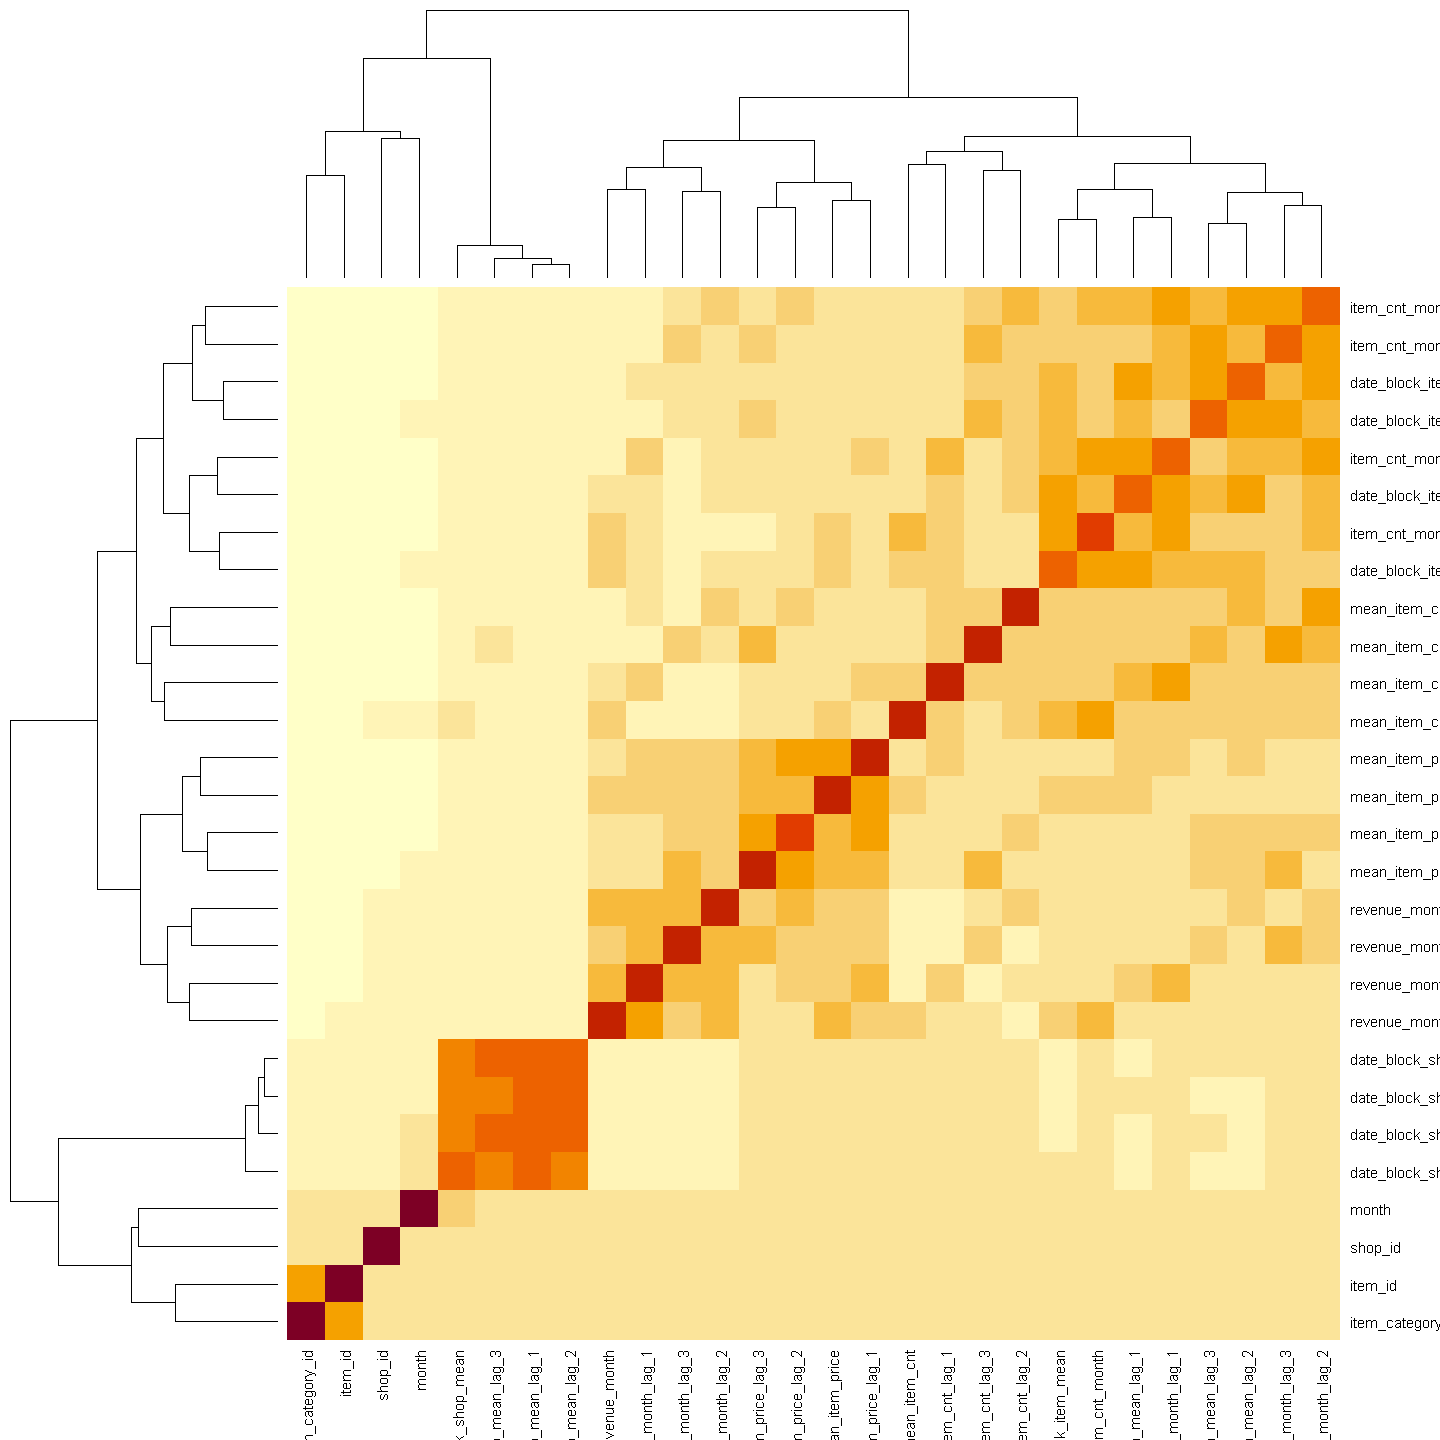

In [19]:
options(repr.plot.width=12, repr.plot.height=12)
heatmap(correlationMatrix)

In [20]:
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
print(sort(highlyCorrelated))

 [1]  4  9 11 14 15 16 17 20 21 22 23 28


In [21]:
train_monthly_1 <- train_monthly[-c(9,11,14,15,16,17,20:23,28)]
head(train_monthly_1)

date_block_num shop_id item_category_id item_id item_cnt_month mean_item_cnt
1 0              5       19               5037    0              0            
2 1              5       19               5037    0              0            
3 2              5       19               5037    0              0            
4 3              5       19               5037    0              0            
5 4              5       19               5037    0              0            
6 5              5       19               5037    0              0            
  mean_item_price revenue_month date_block_shop_mean item_cnt_month_lag_1
1 0               0             0.00000000           0                   
2 0               0             0.02315503           0                   
3 0               0             0.04482417           0                   
4 0               0             0.03120357           0                   
5 0               0             0.03677563           0                   
6 0               0             0.04222387           0                   
  revenue_month_lag_1 item_cnt_month_lag_2 revenue_month_lag_2
1 0                   0                    0                  
2 0                   0                    0                  
3 0                   0                    0                  
4 0                   0                    0                  
5 0                   0                    0                  
6 0                   0                    0                  
  item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
1 0                    0                   0                  
2 0                    0                   0                  
3 0                    0                   0                  
4 0                    0                   0                  
5 0                    0                   0                  
6 0                    0                   0                  
  mean_item_price_lag_3 date_block_item_mean_lag_3
1 0                     0                         
2 0                     0                         
3 0                     0                         
4 0                     0                         
5 0                     0                         
6 0                     0

In [179]:
para_list = list(
        objective = "reg:squarederror",
        eta=0.2,
        gamma = 1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.5
        )

In [22]:
# summary(train_monthly_1)

In [23]:
# control <- rfeControl(method="repeatedcv", functions = rfFuncs ,number=3, repeats=2)

In [24]:
# train_x<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# train_y<-train_monthly_1[train_monthly_1$date_block_num<33,which(names(train_monthly_1) %in% c('item_cnt_month'))]
# head(train)
# valid_y <- train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# test_y<-train_monthly_1[train_monthly_1$date_block_num==34,which(names(train_monthly_1) %in% c('item_cnt_month'))]
# test_x<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
# valid<-train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean'))]
# test<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month','mean_item_price','revenue_month','mean_item_cnt','date_block_shop_mean','date_block_item_mean'))]


In [51]:
# result_rfe1 <- rfe(x = train_x, 
#                    y = train_y, 
#                    sizes = c(1:3),
#                    rfeControl = control)

In [52]:
# control <- trainControl(method="repeatedcv", functions = rfFuncs,number=10, repeats=3)
# model <- train(item_cnt_month~., data=train_monthly, method="lvq", preProcess="scale", trControl=control)
# # estimate variable importance
# importance <- varImp(model, scale=FALSE)
# # summarize importance
# print(importance)
# # plot importance
# plot(importance)


# control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# # run the RFE algorithm
# results <- rfe(train_monthly_1[,c(2,3,7)], train_monthly_1[,5], sizes=c(1:2), rfeControl=control)
# # summarize the results
# print(results)
# # list the chosen features
# predictors(results)
# # plot the results
# plot(results, type=c("g", "o"))

In [97]:
train<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('date_block_shop_mean','date_block_item_mean'))]
# head(train)
valid<-train_monthly_1[train_monthly_1$date_block_num==33,-which(names(train_monthly_1) %in% c('date_block_shop_mean','date_block_item_mean'))]
test<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month','date_block_shop_mean','date_block_item_mean'))]
# tem<-glm(item_cnt_month~.,data=train)#glm(item_cnt_month~.,data=train)
# summary(tem)
# tem_2<-glm(item_cnt_month~mean_item_cnt+revenue_month+mean_item_price,data=train)
# summary(tem_2)


Call:
glm(formula = item_cnt_month ~ mean_item_cnt + revenue_month + 
    mean_item_price, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-30.7466   -0.0025   -0.0025   -0.0025    0.9193  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.491e-03  1.570e-05   158.6   <2e-16 ***
mean_item_cnt   3.174e+01  2.009e-02  1579.6   <2e-16 ***
revenue_month   8.319e+00  1.782e-02   466.9   <2e-16 ***
mean_item_price 5.394e-01  1.518e-03   355.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.001655888)

    Null deviance: 19365  on 7068599  degrees of freedom
Residual deviance: 11705  on 7068596  degrees of freedom
AIC: -25203377

Number of Fisher Scoring iterations: 2


In [152]:
train_x<-train_monthly_1[train_monthly_1$date_block_num<33,-which(names(train_monthly_1) %in% c('item_cnt_month'))]
train_x <- data.matrix(train_x, rownames.force = NA)
# head(train_x)
train_y <- train_monthly_1[train_monthly_1$date_block_num<33,which(names(train_monthly_1) %in% c('item_cnt_month'))]
train_y <- data.matrix(train_y, rownames.force = NA)

In [153]:
head(train_x)

date_block_num shop_id item_category_id item_id mean_item_cnt mean_item_price
1 0              5       19               5037    0             0              
2 1              5       19               5037    0             0              
3 2              5       19               5037    0             0              
4 3              5       19               5037    0             0              
5 4              5       19               5037    0             0              
6 5              5       19               5037    0             0              
  revenue_month date_block_shop_mean item_cnt_month_lag_1 revenue_month_lag_1
1 0             0.00000000           0                    0                  
2 0             0.02315503           0                    0                  
3 0             0.04482417           0                    0                  
4 0             0.03120357           0                    0                  
5 0             0.03677563           0                    0                  
6 0             0.04222387           0                    0                  
  item_cnt_month_lag_2 revenue_month_lag_2 item_cnt_month_lag_3
1 0                    0                   0                   
2 0                    0                   0                   
3 0                    0                   0                   
4 0                    0                   0                   
5 0                    0                   0                   
6 0                    0                   0                   
  revenue_month_lag_3 mean_item_cnt_lag_3 mean_item_price_lag_3
1 0                   0                   0                    
2 0                   0                   0                    
3 0                   0                   0                    
4 0                   0                   0                    
5 0                   0                   0                    
6 0                   0                   0                    
  date_block_item_mean_lag_3
1 0                         
2 0                         
3 0                         
4 0                         
5 0                         
6 0

In [180]:
xgb_cv = xgb.cv(params = para_list,
               data = train_data,
               nrounds = 250,
               nfold = 6,
               print_every_n = 10,
               early_stopping_rounds = 30,
               maximize = F)

[1]	train-rmse:0.395058+0.000173	test-rmse:0.395057+0.000193 
Multiple eval metrics are present. Will use test_rmse for early stopping.
Will train until test_rmse hasn't improved in 30 rounds.

[11]	train-rmse:0.045512+0.000438	test-rmse:0.045535+0.000461 
[21]	train-rmse:0.013148+0.000887	test-rmse:0.013239+0.000957 
[31]	train-rmse:0.010600+0.000822	test-rmse:0.010698+0.000852 
[41]	train-rmse:0.009458+0.000778	test-rmse:0.009574+0.000827 
[51]	train-rmse:0.008774+0.000623	test-rmse:0.008891+0.000696 
[61]	train-rmse:0.008294+0.000412	test-rmse:0.008413+0.000456 
[71]	train-rmse:0.008082+0.000332	test-rmse:0.008200+0.000443 
[81]	train-rmse:0.007939+0.000346	test-rmse:0.008056+0.000444 
[91]	train-rmse:0.007911+0.000347	test-rmse:0.008028+0.000439 
[101]	train-rmse:0.007890+0.000351	test-rmse:0.008008+0.000435 
[111]	train-rmse:0.007874+0.000358	test-rmse:0.007991+0.000438 
[121]	train-rmse:0.007865+0.000361	test-rmse:0.007982+0.000439 
[131]	train-rmse:0.007865+0.000361	test-rmse:0.

In [181]:
train_data <- xgb.DMatrix(label = train_y, data = as.matrix(train_x))
# train_data <- xgb.DMatrix(train_x)

In [113]:
# Training model
model_xgb_1 = xgb.train(data = train_data,
                      params = para_list,
                      nrounds = 400)
 
# model_xgb

In [114]:
model_xgb_1

##### xgb.Booster
raw: 410.7 Kb 
call:
  xgb.train(params = para_list, data = train_data, nrounds = 400)
params (as set within xgb.train):
  objective = "reg:squarederror", eta = "0.1", gamma = "1", max_depth = "6", subsample = "1", colsample_bytree = "0.5", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
# of features: 17 
niter: 400
nfeatures : 17 

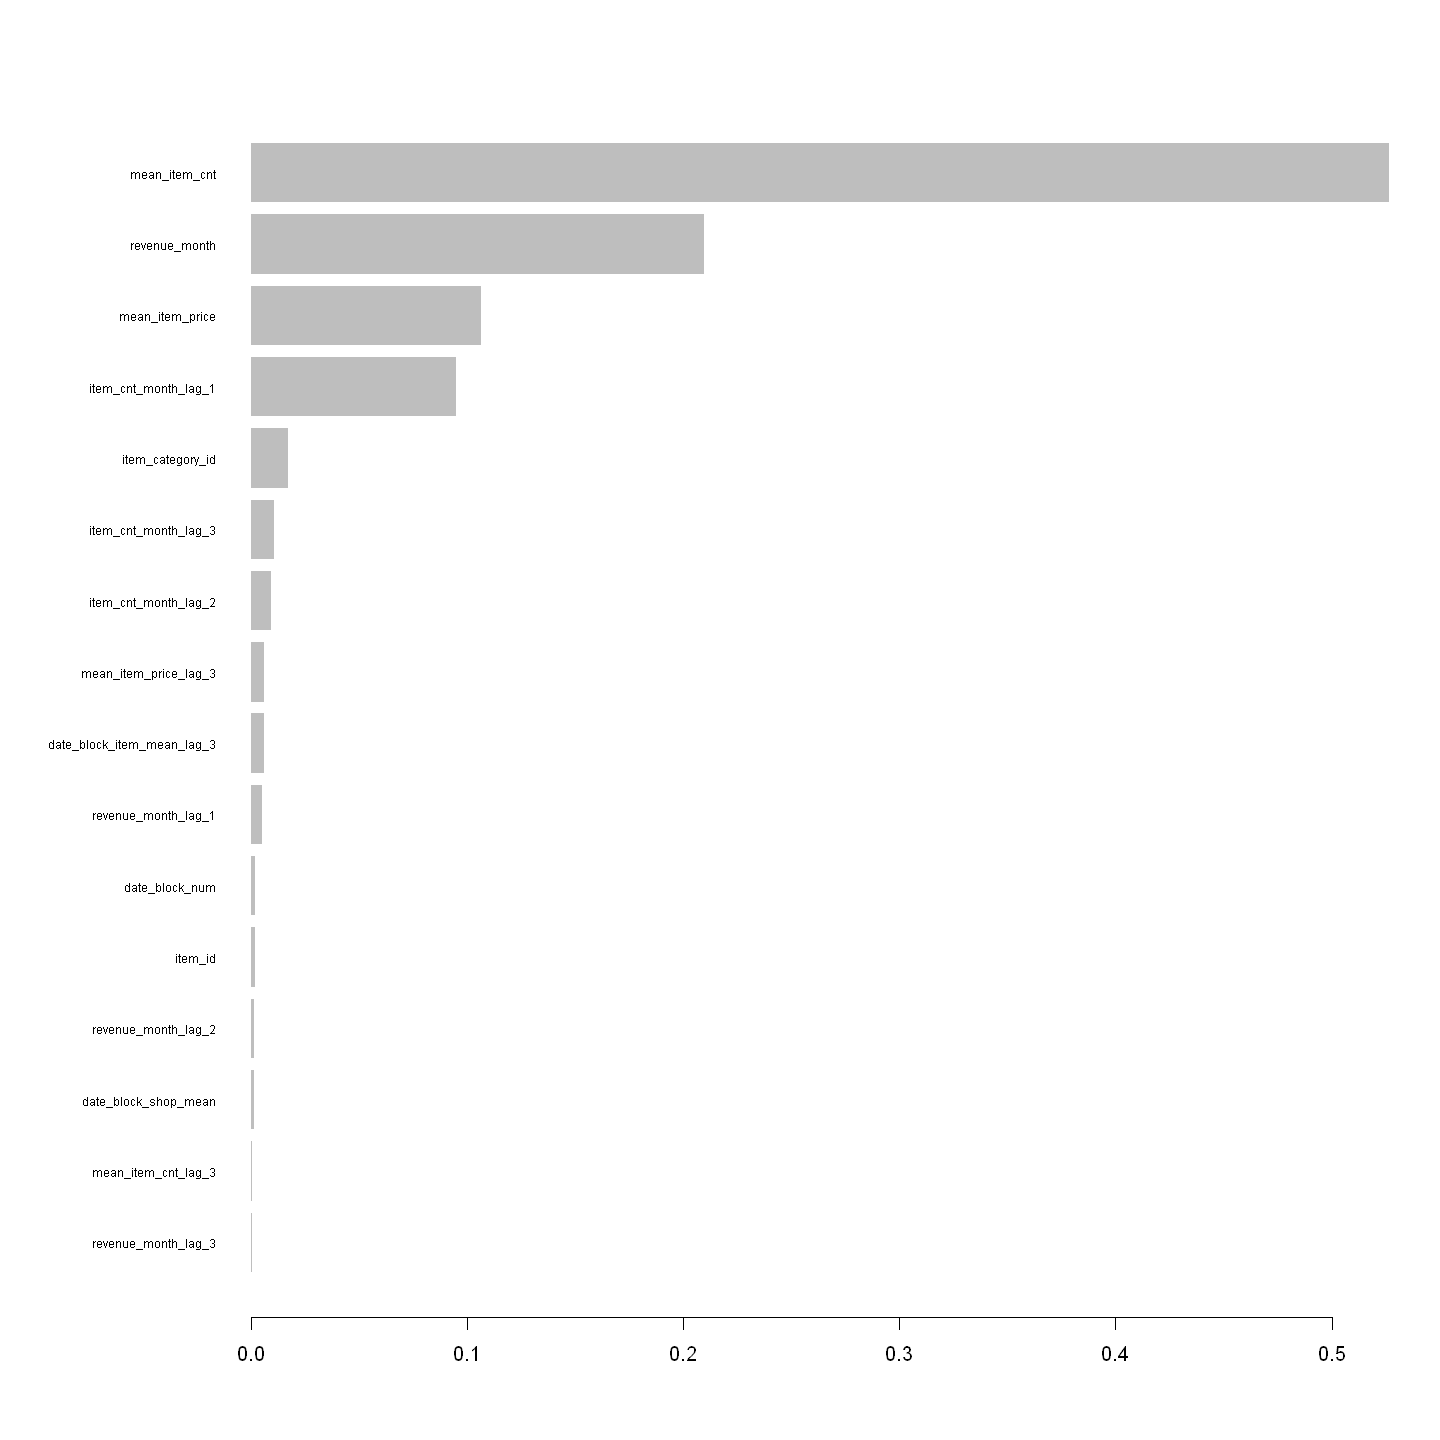

In [116]:
variable_imp = xgb.importance(feature_names = names(train_x),
                              model = model_xgb_1)
 
xgb.plot.importance(variable_imp)

In [199]:
xgb <- xgboost(data = train_x, 
                 label = train_y, 
                 eta = 0.07,
                 max_depth = 8, 
                 nround=200, 
                 nfold = 10,
                 print_every_n = 10,
                 early_stopping_rounds = 30,
                 subsample = 0.8,
                 colsample_bytree = 0.5,
                 seed = 1,
                 objective = "reg:squarederror",
                )

Warning message in xgb.train(params, dtrain, nrounds, watchlist, verbose = verbose, :
"xgb.train: `seed` is ignored in R package.  Use `set.seed()` instead."


[01:16:53] WARNING: amalgamation/../src/learner.cc:627: 
Parameters: { "nfold" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[1]	train-rmse:0.458951 
Will train until train_rmse hasn't improved in 30 rounds.

[11]	train-rmse:0.222671 
[21]	train-rmse:0.108616 
[31]	train-rmse:0.053583 
[41]	train-rmse:0.027273 
[51]	train-rmse:0.015340 
[61]	train-rmse:0.010154 
[71]	train-rmse:0.007867 
[81]	train-rmse:0.007013 
[91]	train-rmse:0.006263 
[101]	train-rmse:0.005875 
[111]	train-rmse:0.005626 
[121]	train-rmse:0.005328 
[131]	train-rmse:0.005080 
[141]	train-rmse:0.004826 
[151]	train-rmse:0.004531 
[161]	train-rmse:0.004441 
[171]	train-rmse:0.004333 
[181]	train-rmse:0.004194 
[191]	train-rmse:0.004089 
[200]	train-rmse:0.003968 


In [65]:
tem_2<-glm(item_cnt_month~item_id+item_cnt_month_lag_2+item_cnt_month_lag_1+item_category_id,data=train)
summary(tem_2)


Call:
glm(formula = item_cnt_month ~ item_id + item_cnt_month_lag_2 + 
    item_cnt_month_lag_1 + item_category_id, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.72275  -0.00399  -0.00287  -0.00178   1.00014  

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           6.707e-03  4.710e-05  142.39   <2e-16 ***
item_id              -7.859e-08  2.477e-09  -31.73   <2e-16 ***
item_cnt_month_lag_2  1.952e-01  3.830e-04  509.67   <2e-16 ***
item_cnt_month_lag_1  5.221e-01  3.773e-04 1384.01   <2e-16 ***
item_category_id     -6.159e-05  9.277e-07  -66.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.001571999)

    Null deviance: 19365  on 7068599  degrees of freedom
Residual deviance: 11112  on 7068595  degrees of freedom
AIC: -25570866

Number of Fisher Scoring iterations: 2


In [ ]:
# train<-train_monthly[train_monthly$date_block_num<33,-which(names(train_monthly) %in% c('revenue_month','date_block_shop_mean','date_block_item_mean'))]
# valid<-train_monthly[train_monthly$date_block_num==33,-which(names(train_monthly) %in% c('revenue_month','date_block_shop_mean','date_block_item_mean'))]
# test<-train_monthly[train_monthly$date_block_num==34,-which(names(train_monthly) %in% c('item_cnt_month','revenue_month','date_block_shop_mean','date_block_item_mean'))]
# head(train)
# tem_3<-glm(item_cnt_month~mean_item_price + mean_item_cnt,data=train)
# summary(tem_3)

In [159]:
test_y<-train_monthly_1[train_monthly_1$date_block_num==34,-which(names(train_monthly_1) %in% c('item_cnt_month'))]

In [160]:
head(test_y)

date_block_num shop_id item_category_id item_id mean_item_cnt
7282801 34             5       19               5037    0            
7282802 34             5       55               5320    0            
7282803 34             5       19               5233    0            
7282804 34             5       23               5232    0            
7282805 34             5       20               5268    0            
7282806 34             5       23               5039    0            
        mean_item_price revenue_month date_block_shop_mean item_cnt_month_lag_1
7282801 0               0             0                    0.00                
7282802 0               0             0                    0.00                
7282803 0               0             0                    0.05                
7282804 0               0             0                    0.00                
7282805 0               0             0                    0.00                
7282806 0               0             0                    0.05                
        revenue_month_lag_1 item_cnt_month_lag_2 revenue_month_lag_2
7282801 0.0000000000        0.05                 0.0001196476       
7282802 0.0000000000        0.00                 0.0000000000       
7282803 0.0001914042        0.15                 0.0004784307       
7282804 0.0000000000        0.00                 0.0000000000       
7282805 0.0000000000        0.00                 0.0000000000       
7282806 0.0002392952        0.05                 0.0001196476       
        item_cnt_month_lag_3 revenue_month_lag_3 mean_item_cnt_lag_3
7282801 0.15                 4.785105e-04        0.002              
7282802 0.00                 0.000000e+00        0.000              
7282803 0.05                 9.562229e-05        0.002              
7282804 0.05                 9.562229e-05        0.002              
7282805 0.00                 0.000000e+00        0.000              
7282806 0.00                 0.000000e+00        0.000              
        mean_item_price_lag_3 date_block_item_mean_lag_3
7282801 0.02983478            0.14625                   
7282802 0.00000000            0.00000                   
7282803 0.01788594            0.18625                   
7282804 0.01788594            0.08000                   
7282805 0.00000000            0.00000                   
7282806 0.00000000            0.13250

In [188]:
y_pred <- predict(xgb, data.matrix(test_y))
y_pred
# test<-(predict(tem_2, test)*(y_max-y_min))+y_min

[1]  3.455203e-04 -1.375449e-05  4.703164e-04  2.449424e-04  1.364123e-05
    [6]  2.633189e-04 -2.526690e-04 -1.507546e-06  9.369759e-04  1.364123e-05
   [11]  4.439299e-04 -3.695440e-04 -1.507546e-06  2.724031e-04  6.416192e-04
   [16] -9.602798e-04 -1.188015e-05 -1.507546e-06 -6.509753e-04  4.856772e-05
   [21] -1.225720e-04  1.364123e-05 -8.128370e-05  7.323053e-04 -1.254678e-03
   [26]  1.364123e-05  1.364123e-05  8.134001e-04  2.345299e-04  2.352088e-03
   [31]  2.144394e-04 -1.321814e-05 -8.420320e-05  3.777185e-04 -1.321814e-05
   [36] -9.711914e-07 -1.321814e-05  3.169091e-04 -1.473028e-04 -1.188015e-05
   [41] -5.506949e-04 -1.153893e-03 -2.166032e-03 -4.131468e-03  8.673469e-04
   [46] -2.412710e-05  6.938563e-04  4.834083e-05  3.485445e-04 -3.872942e-04
   [51] -8.958346e-04  7.152482e-05 -5.690254e-04  3.420147e-04  6.228235e-04
   [56] -1.142372e-03  1.831116e-03  1.513174e-03 -1.821265e-03  2.145640e-02
   [61] -9.380248e-04 -9.364708e-05  4.317426e-04 -1.429148e-04  1.206691e-04
   [66] -1.375449e-05 -3.471067e-04  1.364123e-05  3.763398e-04  1.364123e-05
   [71] -1.375449e-05  3.921727e-04 -5.882487e-04  5.549001e-05  1.364123e-05
   [76]  1.364123e-05 -5.649733e-04  1.206691e-04  3.976850e-04  7.028837e-04
   [81]  4.483855e-04  1.806583e-04 -9.051705e-04  7.198491e-05  1.612524e-03
   [86] -6.605072e-04  2.878540e-05 -1.375449e-05 -1.958766e-03 -1.883293e-03
   [91] -4.263122e-04  2.046051e-06 -7.923873e-04  2.810805e-04  3.844240e-04
   [96] -1.375449e-05  2.588818e-05  6.916666e-04 -1.116972e-04 -3.865062e-04
  [101] -3.212142e-05 -4.837020e-04  3.161457e-04 -1.938176e-04  2.588818e-05
  [106] -1.375449e-05 -1.375449e-05  1.304548e-04 -1.507546e-06 -1.375449e-05
  [111]  2.978815e-04  1.364123e-05  1.364123e-05  1.364123e-05  2.691724e-05
  [116]  6.843838e-05 -9.808012e-06  3.772893e-06  1.098847e-02 -7.933671e-06
  [121] -7.933671e-06 -2.653233e-06  6.871267e-05  7.083744e-05  3.179115e-05
  [126] -2.319154e-04 -2.018062e-05  2.438933e-06 -9.808012e-06  7.947663e-05
  [131]  1.104537e-05 -9.808012e-06  2.776473e-04 -3.799535e-03 -7.933671e-06
  [136] -3.992912e-04  1.785859e-05 -9.808012e-06 -6.255747e-04 -9.808012e-06
  [141]  1.903578e-04  4.869408e-04  2.438933e-06  3.516528e-04 -2.018062e-05
  [146] -2.018062e-05 -2.018062e-05 -9.808012e-06 -9.808012e-06  4.547993e-05
  [151]  7.719373e-06 -9.808012e-06  1.738256e-02 -1.251511e-04  2.438933e-06
  [156]  2.438933e-06  7.719373e-06 -1.675486e-05 -1.100098e-04 -4.286934e-04
  [161] -9.808012e-06  7.947663e-05 -1.675486e-05 -3.662111e-04 -6.594383e-05
  [166] -9.808012e-06  4.558725e-04 -9.808012e-06 -9.808012e-06 -9.808012e-06
  [171]  7.947663e-05  5.840534e-04 -1.013036e-03  4.586537e-04 -5.732265e-04
  [176] -1.660979e-03  2.287514e-04 -9.808012e-06 -3.200270e-05  2.438933e-06
  [181] -7.670659e-04  1.492687e-04 -1.675486e-05 -4.507919e-06  6.724934e-05
  [186] -9.808012e-06  2.438933e-06  2.438933e-06 -9.808012e-06 -9.808012e-06
  [191]  7.897158e-05 -3.086473e-04  6.583581e-05  1.364123e-05  9.962482e-05
  [196]  2.195712e-04 -3.080353e-03 -2.702784e-03 -5.102935e-04  1.364123e-05
  [201] -2.070134e-05  1.364123e-05  2.384126e-04  5.396215e-04  1.100771e-04
  [206]  1.364123e-05  1.364123e-05  1.364123e-05 -1.103458e-04 -1.170580e-06
  [211]  1.940181e-04 -1.507546e-06 -1.375449e-05  4.764946e-04  2.588818e-05
  [216]  4.423299e-04  4.212765e-04  2.588818e-05 -5.290009e-04 -3.108419e-04
  [221] -2.395979e-04  1.206691e-04  1.364123e-05  2.471325e-04 -6.133051e-04
  [226]  3.104118e-04  1.747362e-04  2.821369e-05  2.916367e-04 -1.375449e-05
  [231]  1.596675e-05 -1.273222e-04 -1.089262e-05  3.048762e-05 -1.089262e-05
  [236]  1.354321e-06  9.235071e-05  8.408424e-04 -3.321456e-04  1.798140e-05
  [241] -4.416175e-04 -1.507546e-06 -9.711914e-07  1.364123e-05 -1.375449e-05
  [246]  7.257523e-05  7.778543e-05  3.007533e-04  1.676587e-04  1.364123e-05
  [251]  3.011214e-04  1.726334e-04  2.134602e-04 -1.430500e-04  6.843838e-05
  [256]  1.738024e-02 -1.6

In [189]:
# mean((predict(tem, train)-train[,'item_cnt_month'])^2)
mean((predict(xgb, data.matrix(test_y))-train[,'item_cnt_month'])^2)
# mean((predict(tem_3, train)-train[,'item_cnt_month'])^2)

[1] 0.002831262

In [190]:
# mean((predict(tem, valid)-valid[,'item_cnt_month'])^2)
mean((predict(tem_2, valid)-valid[,'item_cnt_month'])^2)
# mean((predict(tem_3, valid)-valid[,'item_cnt_month'])^2)

[1] 0.005979956

In [191]:
test<-(predict(xgb, data.matrix(test_y))*(y_max-y_min))+y_min
test

[1]  6.910407e-03 -2.750898e-04  9.406328e-03  4.898849e-03  2.728246e-04
    [6]  5.266377e-03 -5.053381e-03 -3.015092e-05  1.873952e-02  2.728246e-04
   [11]  8.878597e-03 -7.390880e-03 -3.015092e-05  5.448062e-03  1.283238e-02
   [16] -1.920560e-02 -2.376030e-04 -3.015092e-05 -1.301951e-02  9.713544e-04
   [21] -2.451441e-03  2.728246e-04 -1.625674e-03  1.464611e-02 -2.509355e-02
   [26]  2.728246e-04  2.728246e-04  1.626800e-02  4.690599e-03  4.704177e-02
   [31]  4.288787e-03 -2.643627e-04 -1.684064e-03  7.554370e-03 -2.643627e-04
   [36] -1.942383e-05 -2.643627e-04  6.338182e-03 -2.946056e-03 -2.376030e-04
   [41] -1.101390e-02 -2.307787e-02 -4.332064e-02 -8.262937e-02  1.734694e-02
   [46] -4.825419e-04  1.387713e-02  9.668167e-04  6.970890e-03 -7.745884e-03
   [51] -1.791669e-02  1.430496e-03 -1.138051e-02  6.840294e-03  1.245647e-02
   [56] -2.284744e-02  3.662232e-02  3.026348e-02 -3.642530e-02  4.291281e-01
   [61] -1.876050e-02 -1.872942e-03  8.634852e-03 -2.858296e-03  2.413383e-03
   [66] -2.750898e-04 -6.942134e-03  2.728246e-04  7.526795e-03  2.728246e-04
   [71] -2.750898e-04  7.843453e-03 -1.176497e-02  1.109800e-03  2.728246e-04
   [76]  2.728246e-04 -1.129947e-02  2.413383e-03  7.953701e-03  1.405767e-02
   [81]  8.967710e-03  3.613165e-03 -1.810341e-02  1.439698e-03  3.225048e-02
   [86] -1.321014e-02  5.757079e-04 -2.750898e-04 -3.917532e-02 -3.766586e-02
   [91] -8.526245e-03  4.092103e-05 -1.584775e-02  5.621611e-03  7.688479e-03
   [96] -2.750898e-04  5.177635e-04  1.383333e-02 -2.233945e-03 -7.730125e-03
  [101] -6.424285e-04 -9.674040e-03  6.322914e-03 -3.876351e-03  5.177635e-04
  [106] -2.750898e-04 -2.750898e-04  2.609097e-03 -3.015092e-05 -2.750898e-04
  [111]  5.957631e-03  2.728246e-04  2.728246e-04  2.728246e-04  5.383447e-04
  [116]  1.368768e-03 -1.961602e-04  7.545786e-05  2.197695e-01 -1.586734e-04
  [121] -1.586734e-04 -5.306465e-05  1.374253e-03  1.416749e-03  6.358231e-04
  [126] -4.638307e-03 -4.036124e-04  4.877866e-05 -1.961602e-04  1.589533e-03
  [131]  2.209074e-04 -1.961602e-04  5.552947e-03 -7.599070e-02 -1.586734e-04
  [136] -7.985824e-03  3.571717e-04 -1.961602e-04 -1.251149e-02 -1.961602e-04
  [141]  3.807156e-03  9.738816e-03  4.877866e-05  7.033055e-03 -4.036124e-04
  [146] -4.036124e-04 -4.036124e-04 -1.961602e-04 -1.961602e-04  9.095987e-04
  [151]  1.543875e-04 -1.961602e-04  3.476512e-01 -2.503023e-03  4.877866e-05
  [156]  4.877866e-05  1.543875e-04 -3.350973e-04 -2.200197e-03 -8.573869e-03
  [161] -1.961602e-04  1.589533e-03 -3.350973e-04 -7.324222e-03 -1.318877e-03
  [166] -1.961602e-04  9.117450e-03 -1.961602e-04 -1.961602e-04 -1.961602e-04
  [171]  1.589533e-03  1.168107e-02 -2.026072e-02  9.173073e-03 -1.146453e-02
  [176] -3.321959e-02  4.575028e-03 -1.961602e-04 -6.400539e-04  4.877866e-05
  [181] -1.534132e-02  2.985375e-03 -3.350973e-04 -9.015837e-05  1.344987e-03
  [186] -1.961602e-04  4.877866e-05  4.877866e-05 -1.961602e-04 -1.961602e-04
  [191]  1.579432e-03 -6.172946e-03  1.316716e-03  2.728246e-04  1.992496e-03
  [196]  4.391423e-03 -6.160705e-02 -5.405567e-02 -1.020587e-02  2.728246e-04
  [201] -4.140269e-04  2.728246e-04  4.768253e-03  1.079243e-02  2.201542e-03
  [206]  2.728246e-04  2.728246e-04  2.728246e-04 -2.206916e-03 -2.341160e-05
  [211]  3.880363e-03 -3.015092e-05 -2.750898e-04  9.529893e-03  5.177635e-04
  [216]  8.846599e-03  8.425530e-03  5.177635e-04 -1.058002e-02 -6.216838e-03
  [221] -4.791957e-03  2.413383e-03  2.728246e-04  4.942650e-03 -1.226610e-02
  [226]  6.208236e-03  3.494725e-03  5.642738e-04  5.832734e-03 -2.750898e-04
  [231]  3.193350e-04 -2.546444e-03 -2.178525e-04  6.097524e-04 -2.178525e-04
  [236]  2.708641e-05  1.847014e-03  1.681685e-02 -6.642911e-03  3.596280e-04
  [241] -8.832350e-03 -3.015092e-05 -1.942383e-05  2.728246e-04 -2.750898e-04
  [246]  1.451505e-03  1.555709e-03  6.015066e-03  3.353175e-03  2.728246e-04
  [251]  6.022427e-03  3.452669e-03  4.269203e-03 -2.861000e-03  1.368768e-03
  [256]  3.476047e-01 -3.3

In [184]:
print(length(y_pred))

[1] 214200


In [192]:
results <- data.frame (ID  = testData$ID,
                  item_cnt_month = y_pred                  )
head(results)

ID item_cnt_month
1 0   3.455203e-04 
2 1  -1.375449e-05 
3 2   4.703164e-04 
4 3   2.449424e-04 
5 4   1.364123e-05 
6 5   2.633189e-04

In [193]:
write.csv(results,file="results/data.csv",row.names = FALSE)

In [108]:
length(test[test>1])

[1] 0